# Home Credit Default Risk (HCDR)

GROUP 20:

Email ID:

Gabriel Levy   (gaalevy@iu.edu)

Akshay Narkhede (anarkhed@iu.edu)

Shubham Singh   (shssingh@iu.edu)

Hiren Rupchandani  (hrupchan@iu.edu)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg compressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data
 

# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [1]:
!pip install kaggle

In [2]:
!pwd


/root/shared/Documents/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission


In [3]:
!pwd

/root/shared/Documents/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission


In [4]:
!ls -l  ~/.kaggle/kaggle.json

ls: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
! kaggle competitions files home-credit-default-risk

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview

The `HomeCredit_columns_description.csv` acts as a data dictioanry.

There are 7 different sources of data:

* __application_train/application_test (307k rows, and 48k rows):__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


### Table sizes
```python
name                       [  rows cols]     MegaBytes         
-----------------------  ------------------  -------
application_train       : [  307,511, 122]:   158MB
application_test        : [   48,744, 121]:   25MB
bureau                  : [ 1,716,428, 17]    162MB
bureau_balance          : [ 27,299,925, 3]:   358MB
credit_card_balance     : [  3,840,312, 23]   405MB
installments_payments   : [ 13,605,401, 8]    690MB
previous_application    : [  1,670,214, 37]   386MB
POS_CASH_balance        : [ 10,001,358, 8]    375MB
```




## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [7]:
DATA_DIR = "Data"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
# !mkdir DATA_DIR

In [8]:
!ls -l DATA_DIR

total 0


In [9]:
# ! kaggle competitions download home-credit-default-risk -p $DATA_DIR --force

In [10]:
!pwd 

/root/shared/Documents/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission


In [11]:
!ls -l $DATA_DIR

total 3034052
-rw-rw-r-- 1 root root 392703158 Dec 11  2019 POS_CASH_balance.csv
-rw-r--r-- 1 root root  57792792 Dec  2 01:07 app_test_poly.csv
-rw-r--r-- 1 root root 363124826 Dec  2 01:07 app_train_poly.csv
-rw-rw-r-- 1 root root  26567651 Dec 11  2019 application_test.csv
-rw-rw-r-- 1 root root 166133370 Dec 11  2019 application_train.csv
-rw-rw-r-- 1 root root 170016717 Dec 11  2019 bureau.csv
-rw-rw-r-- 1 root root 375592889 Dec 11  2019 bureau_balance.csv
-rw-rw-r-- 1 root root 424582605 Dec 11  2019 credit_card_balance.csv
-rw-rw-r-- 1 root root 723118349 Dec 11  2019 installments_payments.csv
-rw-rw-r-- 1 root root 404973293 Dec 11  2019 previous_application.csv
-rwxr-xr-x 1 root root   1320236 Aug 24 16:20 submission.csv


In [12]:
#!rm -r  DATA_DIR

### Imports

In [13]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [14]:
unzippingReq = True #True
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile(f'{DATA_DIR}/home-credit-default-risk.zip', 'r')
    # extractall():  Extract all members from the archive to the current working directory. path specifies a different directory to extract to
    zip_ref.extractall('DATA_DIR') 
    zip_ref.close()


FileNotFoundError: [Errno 2] No such file or directory: 'Data/home-credit-default-risk.zip'

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

### Application train

In [15]:
ls -l /root/shared/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/Phase2/DATA_DIR/application_train.csv

ls: cannot access '/root/shared/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/Phase2/DATA_DIR/application_train.csv': No such file or directory


In [16]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
DATA_DIR='Data'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

(307511, 122)

In [17]:
datasets.keys()

dict_keys(['application_train'])

In [18]:
DATA_DIR

'Data'

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [19]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [20]:
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

In [21]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 20.4 s, sys: 3.33 s, total: 23.7 s
Wall time: 1min 15s


In [22]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

## Summary of Application train

In [23]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [24]:
datasets["application_train"].describe() #numerical only features

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [25]:
datasets["application_test"].describe() #numerical only features

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

In [26]:
datasets["application_train"].describe(include='all') #look at all categorical and numerical

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

## Missing data for application train

In [27]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
COMMONAREA_MEDI             69.87               214865
COMMONAREA_AVG              69.87               214865
COMMONAREA_MODE             69.87               214865
NONLIVINGAPARTMENTS_MODE    69.43               213514
NONLIVINGAPARTMENTS_AVG     69.43               213514
NONLIVINGAPARTMENTS_MEDI    69.43               213514
FONDKAPREMONT_MODE          68.39               210295
LIVINGAPARTMENTS_MODE       68.35               210199
LIVINGAPARTMENTS_AVG        68.35               210199
LIVINGAPARTMENTS_MEDI       68.35               210199
FLOORSMIN_AVG               67.85               208642
FLOORSMIN_MODE              67.85               208642
FLOORSMIN_MEDI              67.85               208642
YEARS_BUILD_MEDI            66.50               204488
YEARS_BUILD_MODE            66.50               204488
YEARS_BUILD_AVG             66.50               204488
OWN_CAR_AGE                 65.99               202929
LANDAREA_MEDI               59.38               182590
LANDAREA_MODE               59.38               182590
LANDAREA_AVG                59.38               182590

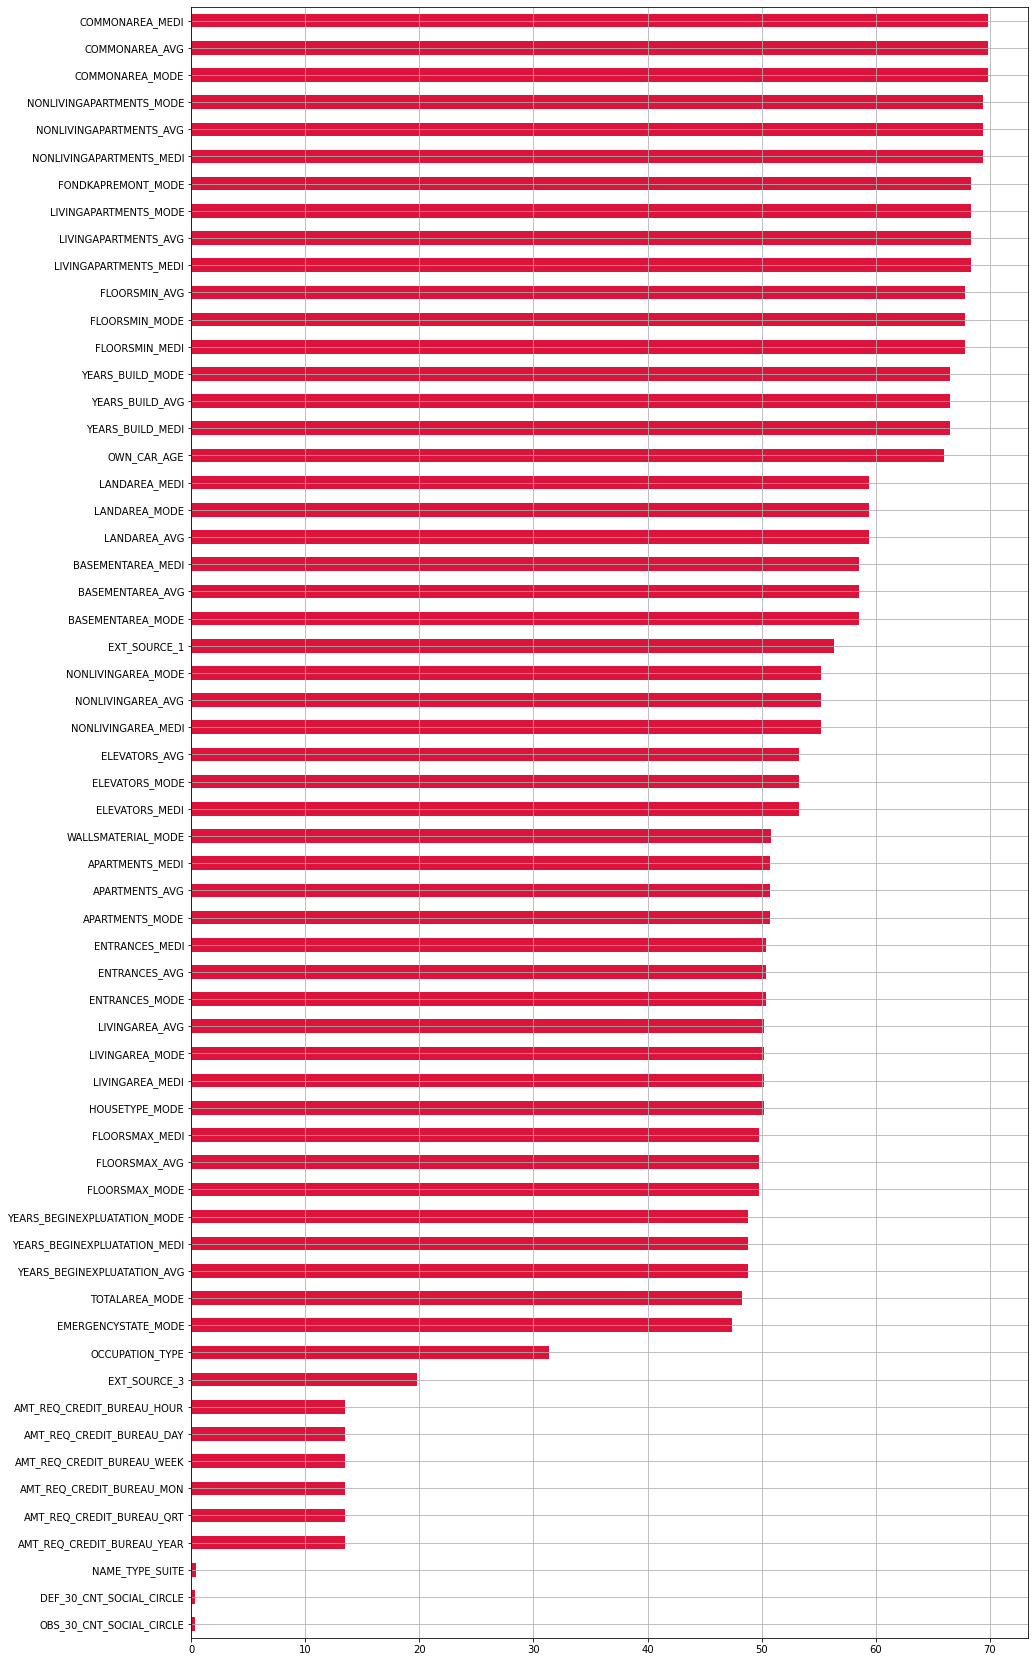

In [28]:
plt.figure(figsize=(15, 7))
missing_application_train_data['Percent'].sort_values().tail(60).plot.barh(figsize=(15, 30), color='crimson')
plt.grid(b=True)
plt.show();

In [29]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_test_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_test_data.head(20)

Percent  Test Missing Count
COMMONAREA_AVG              68.72               33495
COMMONAREA_MODE             68.72               33495
COMMONAREA_MEDI             68.72               33495
NONLIVINGAPARTMENTS_AVG     68.41               33347
NONLIVINGAPARTMENTS_MODE    68.41               33347
NONLIVINGAPARTMENTS_MEDI    68.41               33347
FONDKAPREMONT_MODE          67.28               32797
LIVINGAPARTMENTS_AVG        67.25               32780
LIVINGAPARTMENTS_MODE       67.25               32780
LIVINGAPARTMENTS_MEDI       67.25               32780
FLOORSMIN_MEDI              66.61               32466
FLOORSMIN_AVG               66.61               32466
FLOORSMIN_MODE              66.61               32466
OWN_CAR_AGE                 66.29               32312
YEARS_BUILD_AVG             65.28               31818
YEARS_BUILD_MEDI            65.28               31818
YEARS_BUILD_MODE            65.28               31818
LANDAREA_MEDI               57.96               28254
LANDAREA_AVG                57.96               28254
LANDAREA_MODE               57.96               28254

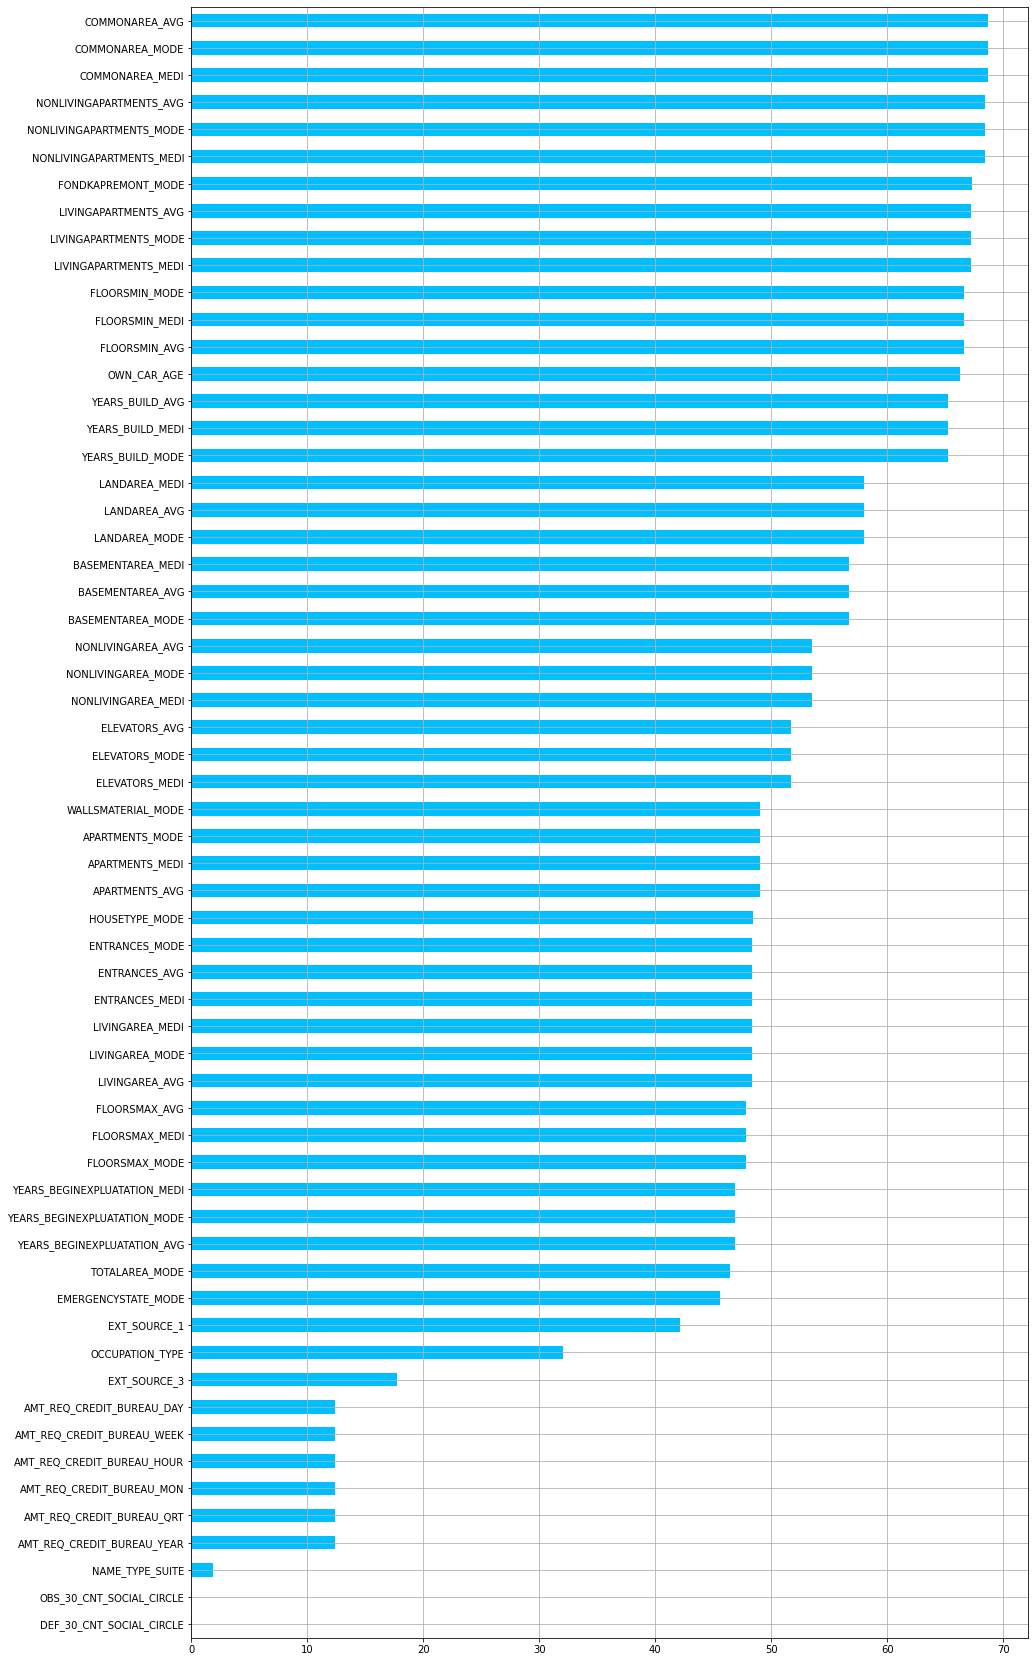

In [30]:
plt.figure(figsize=(15, 7))
missing_application_test_data['Percent'].sort_values().tail(60).plot.barh(figsize=(15, 30), color='deepskyblue')
plt.grid(b=True)
plt.show();

### **Observation**:

- We can see that a large portion of the data is missing from train and test sets


In [31]:
# Setting up the train and test datasets

app_train = datasets["application_train"]
app_test = datasets["application_test"]

## Distribution of the target column 

In [32]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

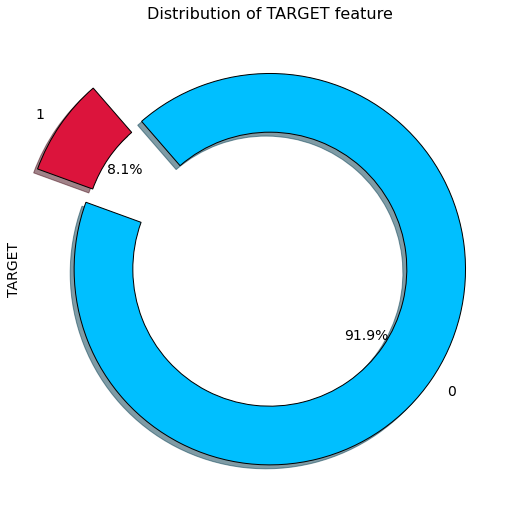

In [33]:
plt.figure(figsize=(9, 9))
plt.pie(x=app_train['TARGET'].value_counts(),
        radius=1.3-0.3,
        labels=app_train['TARGET'].value_counts().index,
        autopct='%1.1f%%',
        colors=['deepskyblue', 'crimson'],
        explode=[0,0.3],
        wedgeprops={"edgecolor":"0", "width":0.3},
        startangle=160,
        shadow=True,
        textprops={'fontsize': 14})
plt.ylabel('TARGET', fontsize=14)
plt.title('Distribution of TARGET feature', fontsize=16)
plt.show()

### **Observation**:

- We can observe a high amount of imbalance in the TARGET feature.

- This will cause issues when measuring the accuracy performance metric.


## Correlation with  the target column 

In [34]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values(ascending=False)
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64

Most Negative Correlations:
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64


### **Observation**:

- The maximum positive correlation with TARGET feature is observed as 0.0782 with DAYS_BIRTH feature. We will obeserve that in the coming sections.

- This is followed by REGION_RATING, DAYS_LAST_PHONE_CHANGE, DAYS_ID_PUBLISH, and REG_CITY_NOT_WORK_CITY features.

- High indirect correlation is observed between TARGET and FLOORS features, External Sources, AMT_GOODS_PRICE, and relative population features.


In [35]:
train_corr = datasets["application_train"].corr()

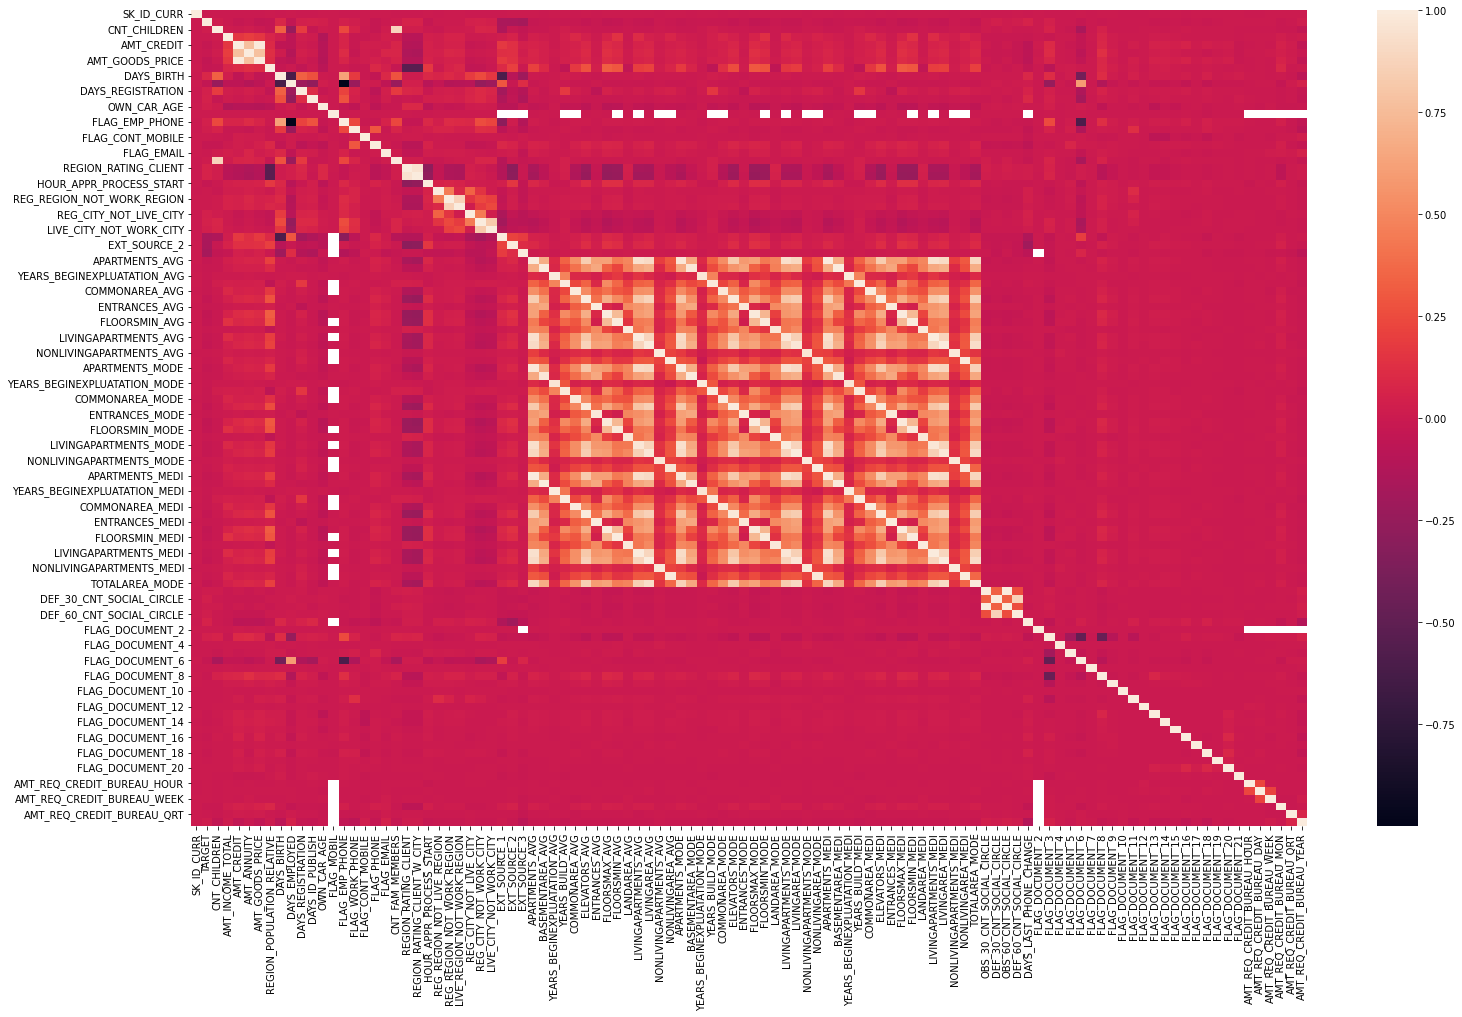

In [36]:
plt.figure(figsize=(25, 15))
sns.heatmap(train_corr, cmap='rocket')
plt.plot();

### **Observation**:

- The heatmap can't be made sense of as of now since we have 120+ columns to compare from.


In [37]:
# Extract the EXT_SOURCE variables and show correlations
ext_source_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_source_data_corrs = ext_source_data.corr()
ext_source_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919    0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846   -0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167   -0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000   -0.205478
DAYS_BIRTH    0.078239     -0.600610     -0.091996     -0.205478    1.000000

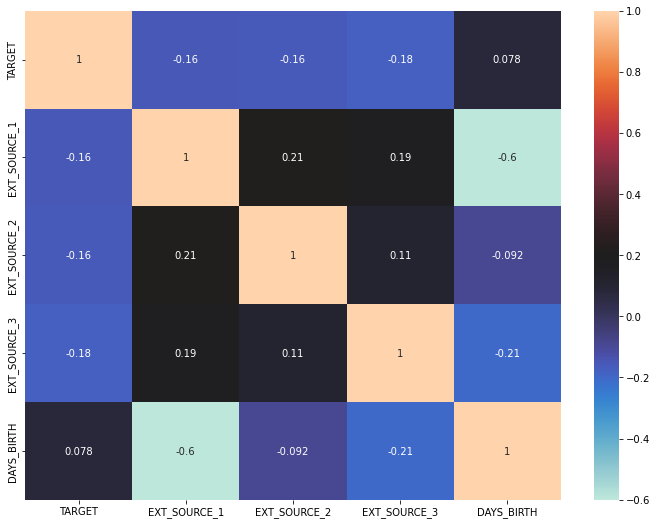

In [38]:
plt.figure(figsize=(12, 9))
sns.heatmap(ext_source_data_corrs, annot=True, cmap='icefire')
plt.plot();

### **Observation**:

- The heatmap shows us that external sources indirectly affect the TARGET feature.

- But we can also see that they are correlated to each other as well i.e. multicollinearity is present.


In [39]:
app_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [40]:
# Extract the AMOUNT variables and show correlations
amount_data = app_train[['TARGET', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']]
amount_data_corrs = amount_data.corr()
amount_data_corrs

TARGET  AMT_CREDIT  AMT_INCOME_TOTAL  AMT_GOODS_PRICE
TARGET            1.000000   -0.030369         -0.003982        -0.039645
AMT_CREDIT       -0.030369    1.000000          0.156870         0.986968
AMT_INCOME_TOTAL -0.003982    0.156870          1.000000         0.159610
AMT_GOODS_PRICE  -0.039645    0.986968          0.159610         1.000000

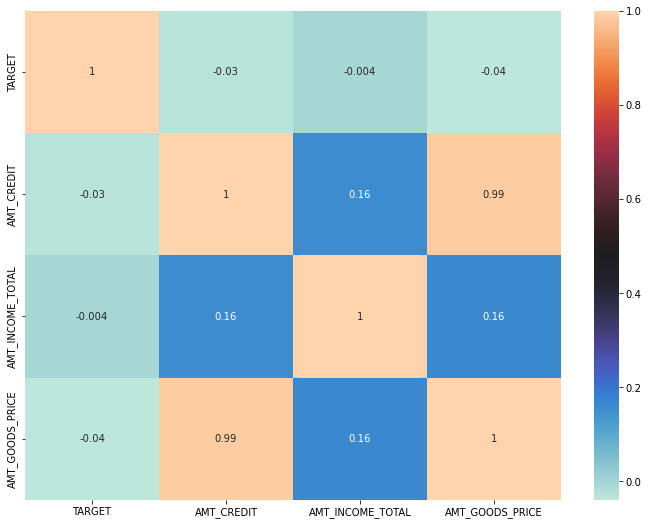

In [41]:
plt.figure(figsize=(12, 9))
sns.heatmap(amount_data_corrs, annot=True, cmap='icefire')
plt.plot();

### **Observation**:

- The heatmap shows us yet again a case of multicollinearity among the AMT featurs.

- We may have to deal with these features while proceeding with the modelling.

## **Exploratory Data Analysis on Categorical Features**

## **Applicants Age**

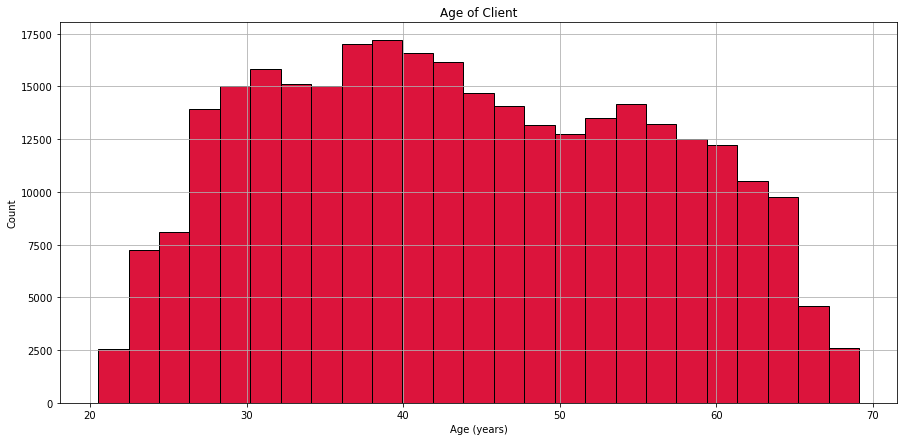

In [42]:
plt.figure(figsize=(15, 7))
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25, color='crimson')
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.grid(b=True)
plt.show()

### **Observation**:

- Age is obtained by the DAYS_BIRTH feature which has negative values. This is inconsistent and should be taken care of.

- On plotting the age as number of years, we see a fairly standard distribution which is a good sign in such a complicated dataset as we have DAYS_BIRTH highly correlated with TARGET feature.


In [43]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['GROUPED_YEARS_BIRTH'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH GROUPED_YEARS_BIRTH
0       1       -9461    25.920548        (25.0, 30.0]
1       0      -16765    45.931507        (45.0, 50.0]
2       0      -19046    52.180822        (50.0, 55.0]
3       0      -19005    52.068493        (50.0, 55.0]
4       0      -19932    54.608219        (50.0, 55.0]
5       0      -16941    46.413699        (45.0, 50.0]
6       0      -13778    37.747945        (35.0, 40.0]
7       0      -18850    51.643836        (50.0, 55.0]
8       0      -20099    55.065753        (55.0, 60.0]
9       0      -14469    39.641096        (35.0, 40.0]

In [44]:
age_groups  = age_data.groupby('GROUPED_YEARS_BIRTH').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
GROUPED_YEARS_BIRTH                                     
(20.0, 25.0]         0.123036  -8532.795625    23.377522
(25.0, 30.0]         0.111436 -10155.219250    27.822518
(30.0, 35.0]         0.102814 -11854.848377    32.479037
(35.0, 40.0]         0.089414 -13707.908253    37.555913
(40.0, 45.0]         0.078491 -15497.661233    42.459346
(45.0, 50.0]         0.074171 -17323.900441    47.462741
(50.0, 55.0]         0.066968 -19196.494791    52.593136
(55.0, 60.0]         0.055314 -20984.262742    57.491131
(60.0, 65.0]         0.052737 -22780.547460    62.412459
(65.0, 70.0]         0.037270 -24292.614340    66.555108

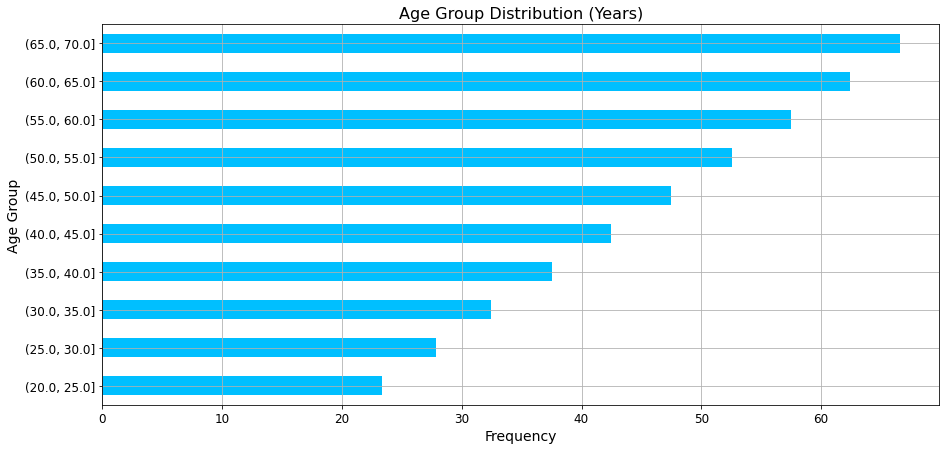

In [45]:
age_groups['YEARS_BIRTH'].plot.barh(figsize=(15, 7), color='deepskyblue')
plt.title('Age Group Distribution (Years)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.grid(b=True)
plt.show()

### **Observation**:

- After performing binning, we can observe that older people tend to take more loans than younger people.


## Applicants occupations

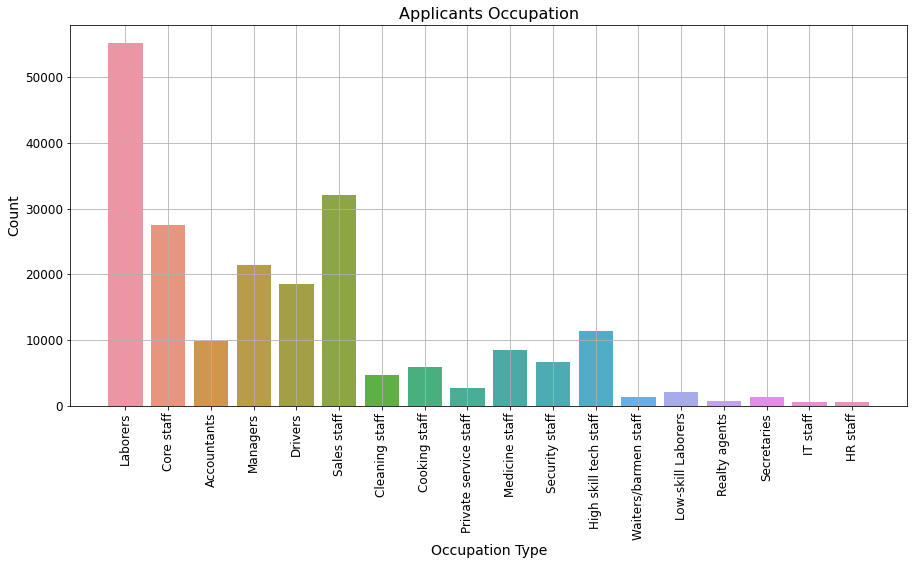

In [46]:
plt.figure(figsize=(15, 7))
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"])
plt.title('Applicants Occupation', fontsize=16)
plt.xlabel('Occupation Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)
plt.plot();

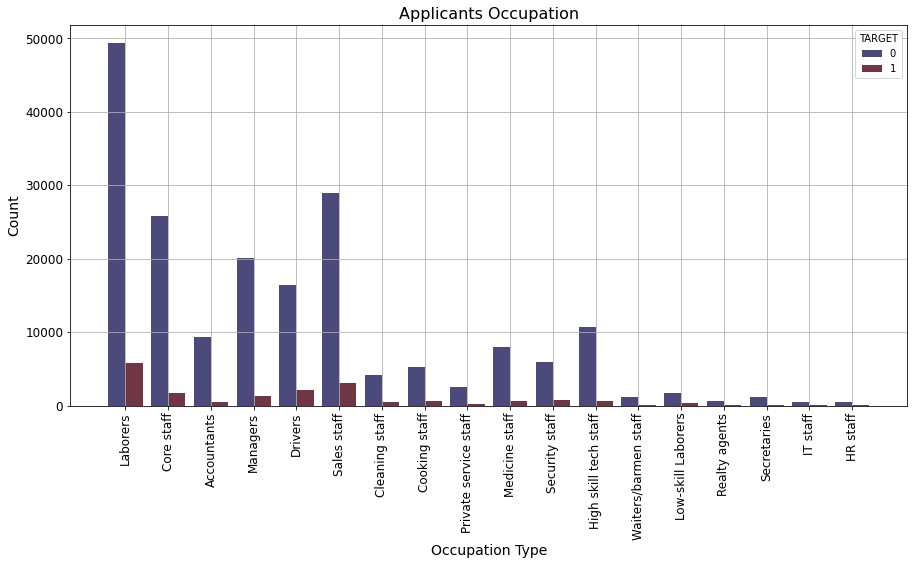

In [47]:
plt.figure(figsize=(15, 7))
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"], hue='TARGET', palette='icefire')
plt.title('Applicants Occupation', fontsize=16)
plt.xlabel('Occupation Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)
plt.plot();

### **Observation**:

- We see 18 different occupations among the borrowers, led by Laborers, Sales staff, Core staff, Managers and Drivers.

- We can't observe any specific trend as to which occupation class successfully pays back their loan.


## **Applicant Contract Type**

In [48]:
app_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

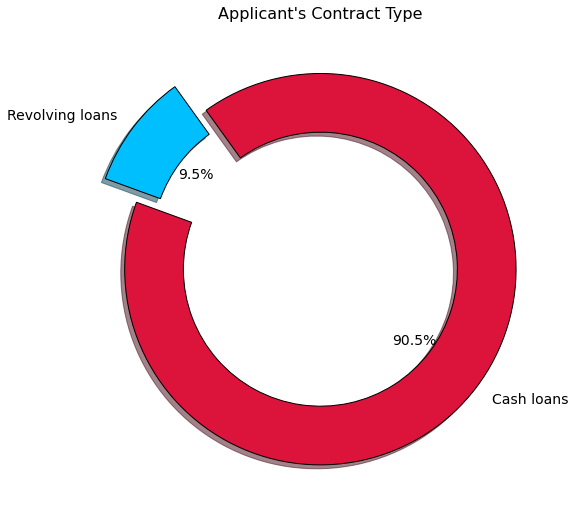

In [49]:
plt.figure(figsize=(9, 9))
plt.pie(x=app_train['NAME_CONTRACT_TYPE'].value_counts(),
        radius=1.3-0.3,
        labels=app_train['NAME_CONTRACT_TYPE'].value_counts().index,
        autopct='%1.1f%%',
        colors=['crimson', 'deepskyblue'],
        explode=[0,0.2],
        wedgeprops={"edgecolor":"0", "width":0.3},
        startangle=160,
        shadow=True,
        textprops={'fontsize': 14})
plt.ylabel('', fontsize=14)
plt.title("Applicant's Contract Type", fontsize=16)
plt.show()

### **Observation**:

- There are two type of loan contracts - Cash loans (90.5%) and Revolving (re-pay and re-borrow again and again) loans (9.5%)


## **Applicant Education Type v/s TARGET**

In [50]:
app_train['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

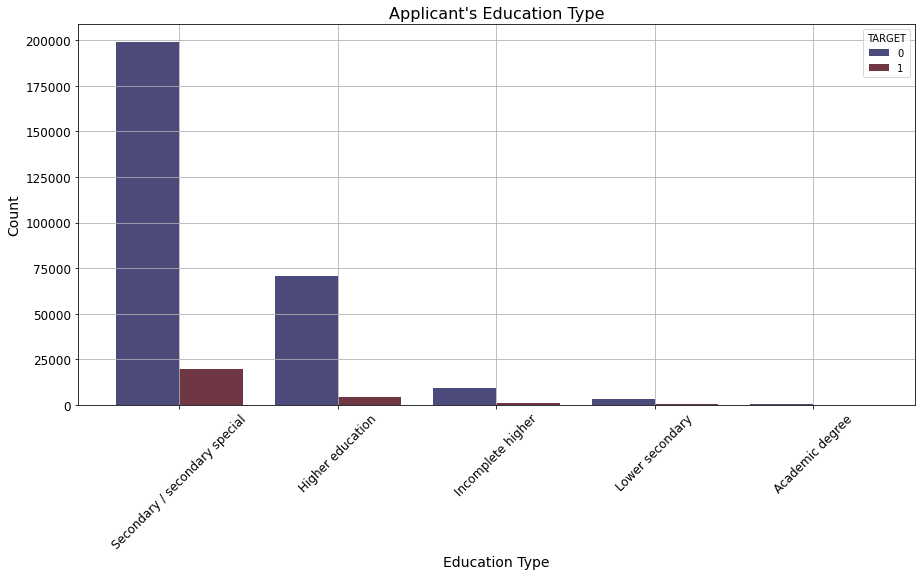

In [51]:
plt.figure(figsize=(15, 7))
sns.countplot(x='NAME_EDUCATION_TYPE', data=app_train, palette='icefire', hue='TARGET')
plt.title("Applicant's Education Type", fontsize=16)
plt.xlabel('Education Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)
plt.plot();

### **Observation**:

- We see most of the applicants have highest education of secondary and higher education with the lowest being Academic degree.


## **Applicant Housing Type v/s TARGET**

In [52]:
app_train['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

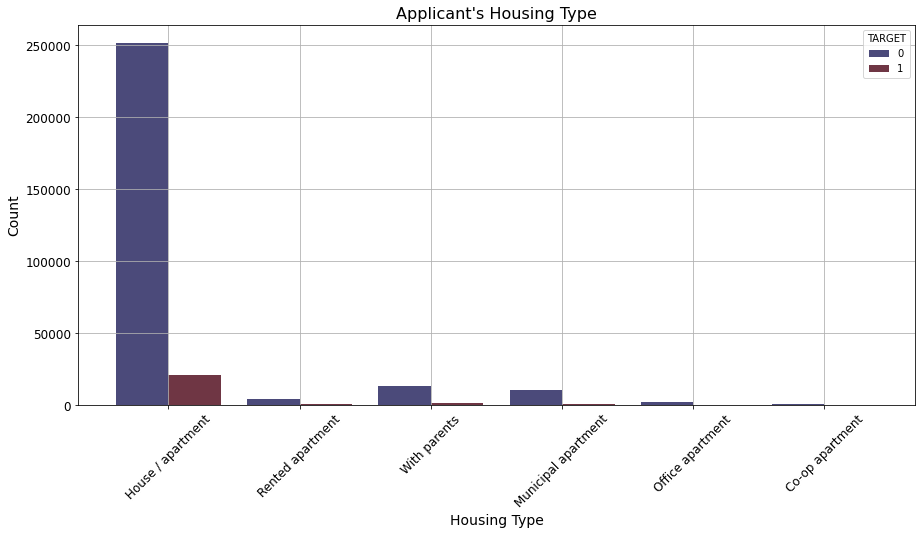

In [53]:
plt.figure(figsize=(15, 7))
sns.countplot(x='NAME_HOUSING_TYPE', data=app_train, palette='icefire', hue='TARGET')
plt.title("Applicant's Housing Type", fontsize=16)
plt.xlabel('Housing Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)
plt.plot();

### **Observation**:

- Most of the applicant's current house type is a house or an apartment followed by living with parents (searching for a new home for themselves) and municipal apartment.


## **Applicant Organization Type**

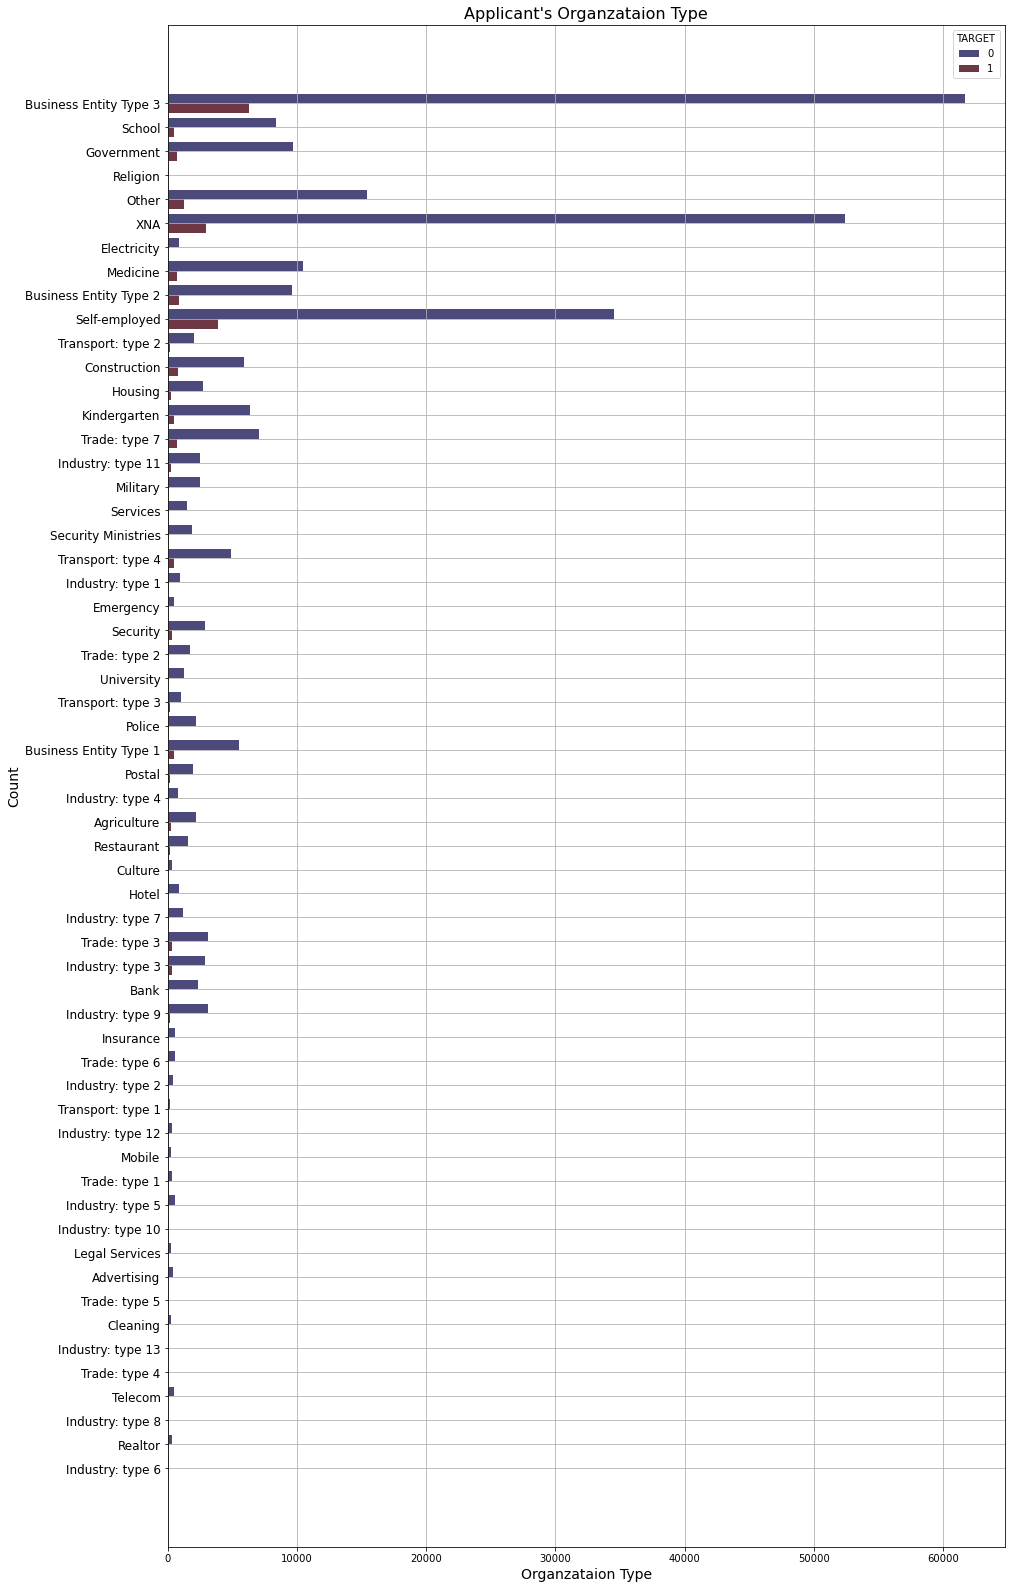

In [54]:
plt.figure(figsize=(15, 28))
sns.countplot(y='ORGANIZATION_TYPE', data=app_train, palette='icefire', hue='TARGET')
plt.title("Applicant's Organzataion Type", fontsize=16)
plt.xlabel('Organzataion Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
# plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)
plt.plot();

### **Observation**:

- There are several organization types across various applicants predominantly from Type 3 business entities and self-employement.


## **Applicant's House Wall Material Type**

In [55]:
app_train['WALLSMATERIAL_MODE'].value_counts()

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64

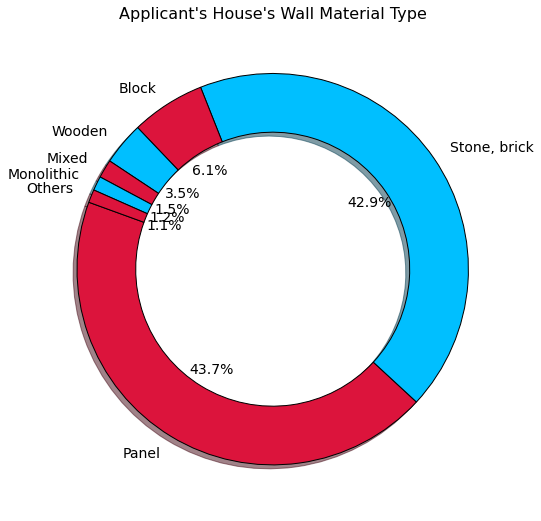

In [56]:
plt.figure(figsize=(9, 9))
plt.pie(x=app_train['WALLSMATERIAL_MODE'].value_counts(),
        radius=1.3-0.3,
        labels=app_train['WALLSMATERIAL_MODE'].value_counts().index,
        autopct='%1.1f%%',
        colors=['crimson', 'deepskyblue'],
        # explode=[0.2,0.2,0,0.2,0,0.2,0],
        wedgeprops={"edgecolor":"0", "width":0.3},
        startangle=160,
        shadow=True,
        textprops={'fontsize': 14})
plt.ylabel('', fontsize=14)
plt.title("Applicant's House's Wall Material Type", fontsize=16)
plt.show()

### **Observation**:

- Most Applicant's house's wall material are made of panels or stones and bricks, followed by cement blocks, wood or a mix of the earlier mentioned.


## **Applicant's House Type Part 2**

In [57]:
app_train['HOUSETYPE_MODE'].value_counts()

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

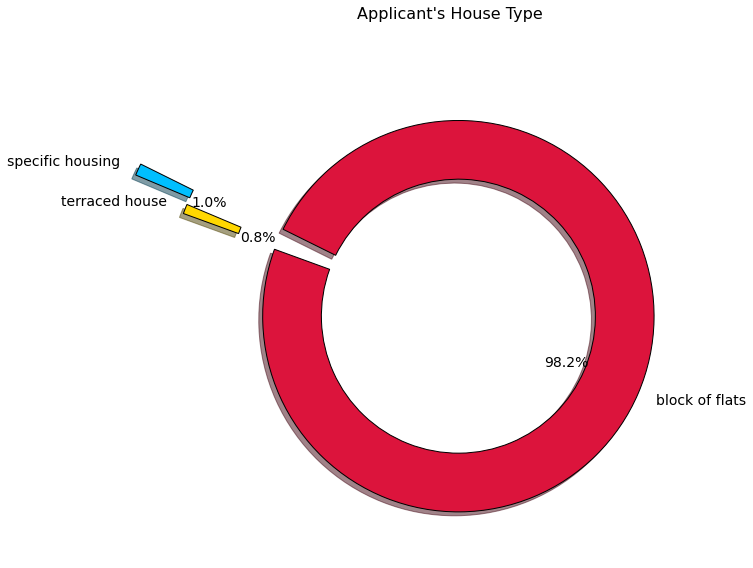

In [58]:
plt.figure(figsize=(9, 9))
plt.pie(x=app_train['HOUSETYPE_MODE'].value_counts(),
        radius=1.3-0.3,
        labels=app_train['HOUSETYPE_MODE'].value_counts().index,
        autopct='%1.1f%%',
        colors=['crimson', 'deepskyblue', 'gold'],
        explode=[0,0.8,0.5],
        wedgeprops={"edgecolor":"0", "width":0.3},
        startangle=160,
        shadow=True,
        textprops={'fontsize': 14})
plt.ylabel('', fontsize=14)
plt.suptitle("Applicant's House Type", fontsize=16)
plt.show()

### **Observation**:

- Applicants mostly reside in flats (more than 98%) while the remaining either live in terraced or other specific house types.

## **Does an Applicant already own Realty?**

In [59]:
app_train['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

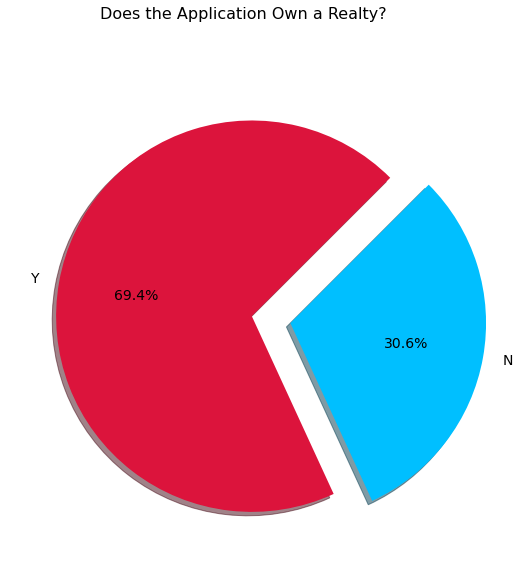

In [60]:
plt.figure(figsize=(9, 9))
plt.pie(x=app_train['FLAG_OWN_REALTY'].value_counts(),
        radius=1.3-0.3,
        labels=app_train['FLAG_OWN_REALTY'].value_counts().index,
        autopct='%1.1f%%',
        colors=['crimson', 'deepskyblue'],
        explode=[0,0.2],
        # wedgeprops={"edgecolor":"0", "width":0.3},
        startangle=45,
        shadow=True,
        textprops={'fontsize': 14})
plt.ylabel('', fontsize=14)
plt.suptitle("Does the Application Own a Realty?", fontsize=16)
plt.show()

### **Observation**:

- 69.4% Applicants already own a realty. Let's see the distribution of the repayment.


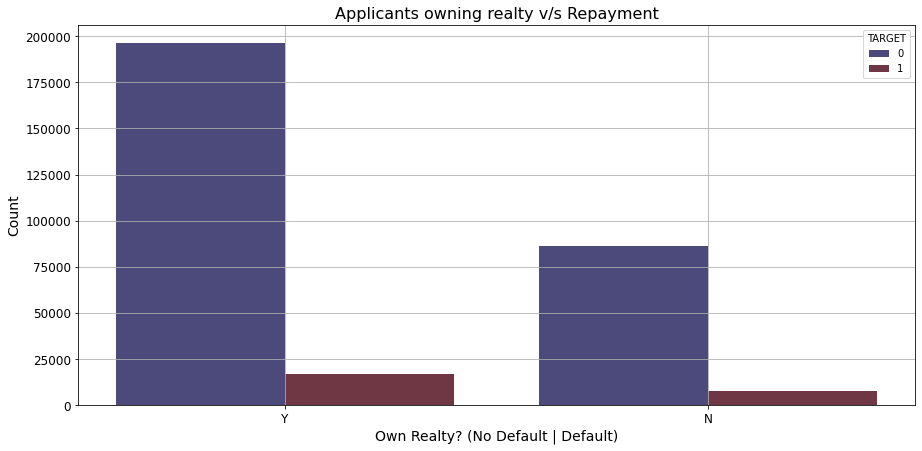

In [61]:
plt.figure(figsize=(15, 7))
sns.countplot(x='FLAG_OWN_REALTY', data=app_train, palette='icefire', hue='TARGET')
plt.title("Applicants owning realty v/s Repayment", fontsize=16)
plt.xlabel('Own Realty? (No Default | Default)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)
plt.plot();

### **Observation**:

- Most of the applicants in either class are not in default. Less than 25000 applicants own a realty and are in default for their repayment.


## **Does an Applicant own cars?**

In [62]:
app_train['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

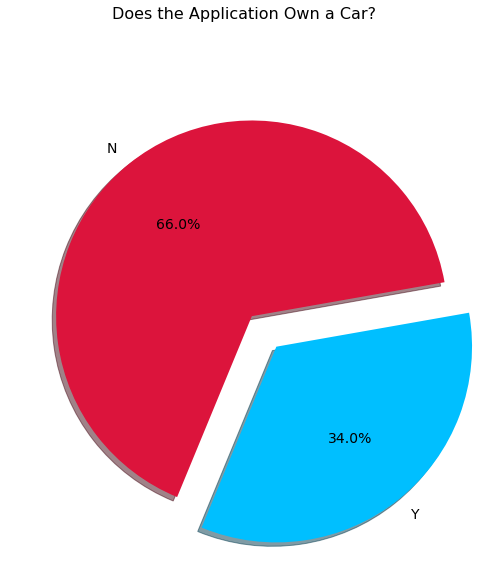

In [63]:
plt.figure(figsize=(9, 9))
plt.pie(x=app_train['FLAG_OWN_CAR'].value_counts(),
        radius=1.3-0.3,
        labels=app_train['FLAG_OWN_CAR'].value_counts().index,
        autopct='%1.1f%%',
        colors=['crimson', 'deepskyblue'],
        explode=[0,0.2],
        # wedgeprops={"edgecolor":"0", "width":0.3},
        startangle=10,
        shadow=True,
        textprops={'fontsize': 14})
plt.ylabel('', fontsize=14)
plt.suptitle("Does the Application Own a Car?", fontsize=16)
plt.show()

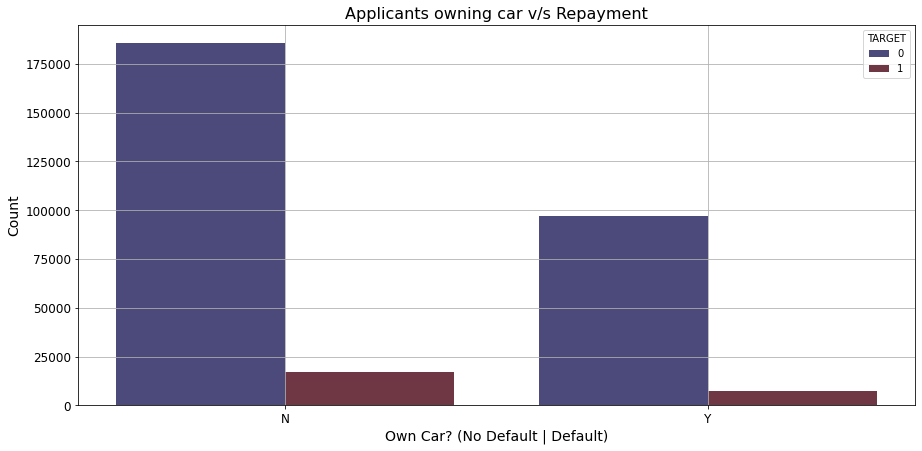

In [64]:
plt.figure(figsize=(15, 7))
sns.countplot(x='FLAG_OWN_CAR', data=app_train, palette='icefire', hue='TARGET')
plt.title("Applicants owning car v/s Repayment", fontsize=16)
plt.xlabel('Own Car? (No Default | Default)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)
plt.plot();

### **Observation**:

- 34% applicants own atleast one car.

- No specific relation to be noted here when it comes to finding a relation between car ownership and loan repayment.

## **Which Gender seems more likely to take and re-pay loans?**

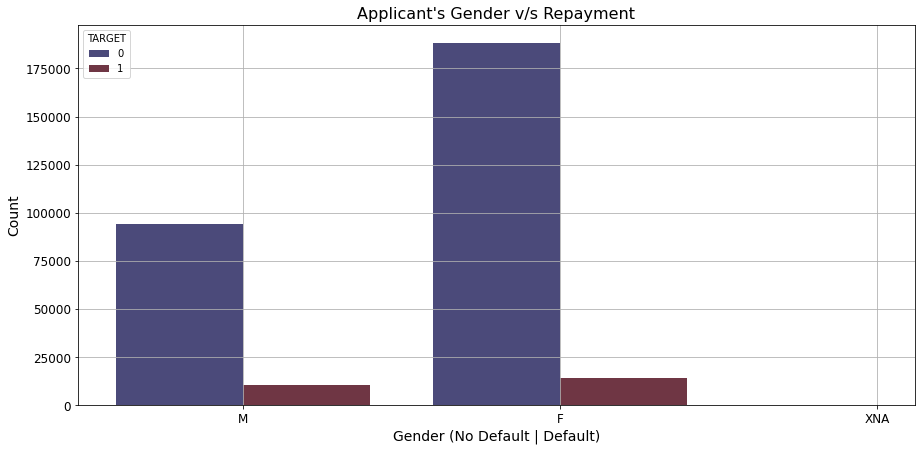

In [65]:
plt.figure(figsize=(15, 7))
sns.countplot(x='CODE_GENDER', data=app_train, palette='icefire', hue='TARGET')
plt.title("Applicant's Gender v/s Repayment", fontsize=16)
plt.xlabel('Gender (No Default | Default)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)
plt.plot();

### **Observation**:

- Most of the applicants are females and most of them have no default in their history.

- In case of male applicants, we can see that relatively higher number of applicants are in default.


## **Exploratory Data Analysis on Numeric/Continuous Features**

## **Target v/s Age (in years)**

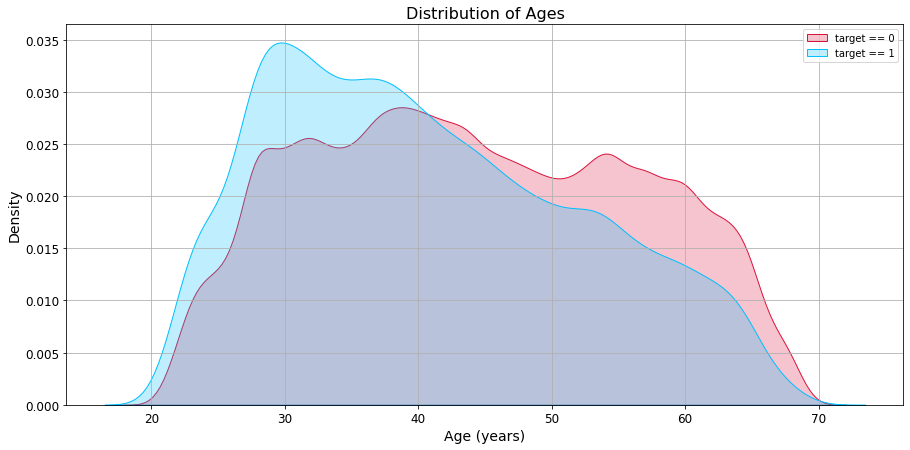

In [66]:
plt.figure(figsize = (15, 7))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0', color='crimson', fill=True)

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1', color='deepskyblue', fill=True)

# Labeling of plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Ages', fontsize=16)

plt.legend()
plt.grid(b=True)
plt.show()

### **Observation**

- We can observe a skew of defaults towards the younger applicants.

- This indicates that older applicants repaid their loans in a more timely/efficient manner.

### **Checking the distribution of AMT_CREDIT feature**

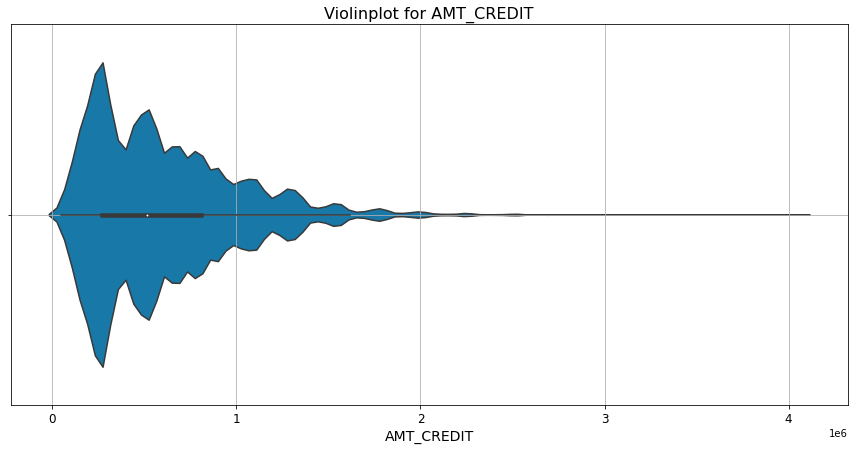

In [67]:
plt.figure(figsize=(15, 7))
sns.violinplot(x=app_train['AMT_CREDIT'], palette='winter')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('AMT_CREDIT', size=14)
plt.title('Violinplot for AMT_CREDIT', size=16)
plt.grid(b=True)

### **Observation**

- We can observe that the feature is right skewed.
- Scaling might help us use this feature appropriately

### **Checking the distribution of AMT_ANNUITY feature**

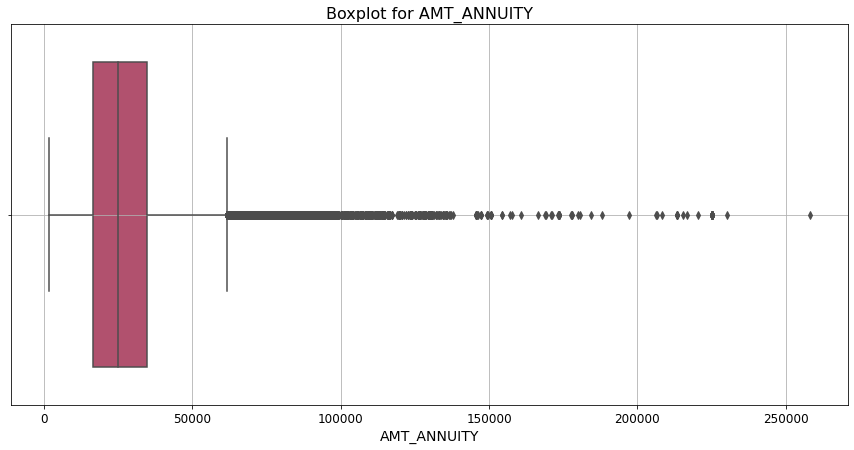

In [68]:
plt.figure(figsize=(15, 7))
sns.boxplot(x=app_train['AMT_ANNUITY'], palette='flare')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('AMT_ANNUITY', size=14)
plt.title('Boxplot for AMT_ANNUITY', size=16)
plt.grid(b=True)

### **Observation**

- We observe yet again a right skewed feature with a lot of outliers.

- We can't remove these outliers since we might lose important information.

### **Checking the distribution of AMT_GOODS_PRICE feature**

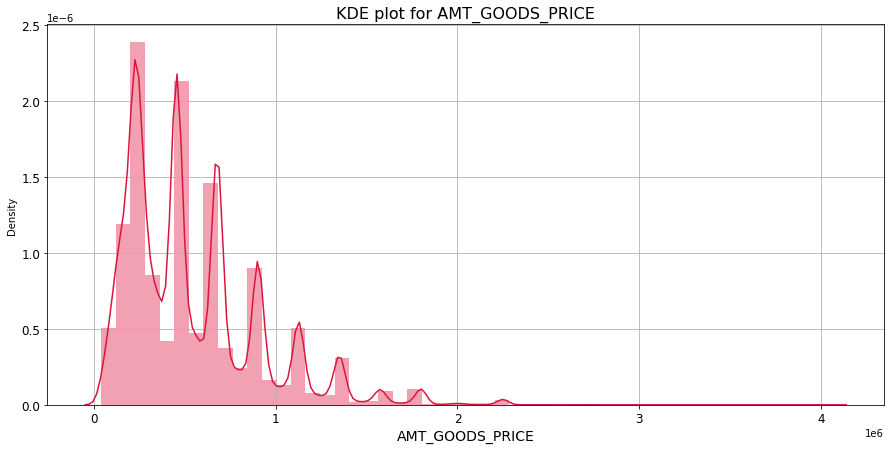

In [69]:
plt.figure(figsize=(15, 7))
sns.distplot(x=app_train['AMT_GOODS_PRICE'], color='crimson')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('AMT_GOODS_PRICE', size=14)
plt.title('KDE plot for AMT_GOODS_PRICE', size=16)
plt.grid(b=True)

### **Observation**

- We see yet another skewed distribution which is multi-modal in nature.

- Binning might help to make an efficient use of this feature.

### **Checking the distribution of DAYS_EMPLOYED feature**

In [70]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

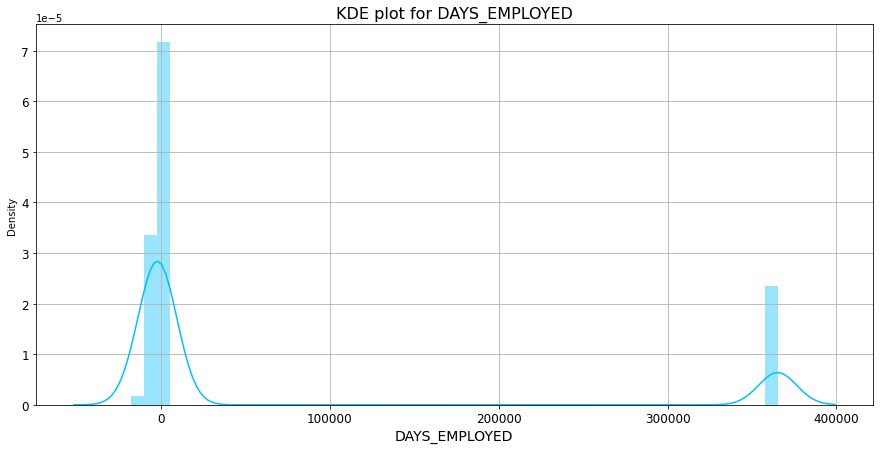

In [71]:
plt.figure(figsize=(15, 7))
sns.distplot(x=app_train['DAYS_EMPLOYED'], color='deepskyblue')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('DAYS_EMPLOYED', size=14)
plt.title('KDE plot for DAYS_EMPLOYED', size=16)
plt.grid(b=True)

### **Observation**

- Just like DAYS_BIRTH, this feature has negative days values.

- But we observe a weird anomaly here - max days employed is 365243 days which is a thousand years.

- We will simply ignore this anomaly (replace with appropriate values) and check the distribution of the feature again.

### **Checking the distribution of DAYS_EMPLOYED feature after removing the inconsistent value**

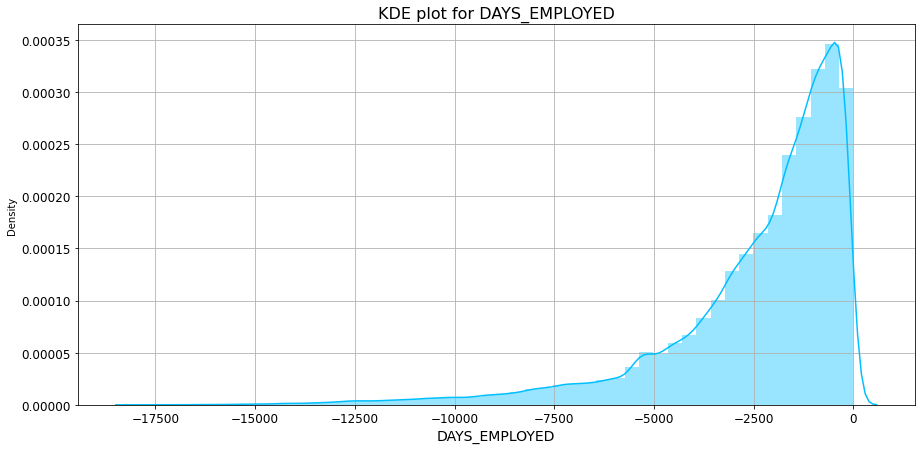

In [72]:
days_employed = app_train['DAYS_EMPLOYED']
days_employed = days_employed[days_employed<365243]
plt.figure(figsize=(15, 7))
sns.distplot(x=days_employed, color='deepskyblue')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('DAYS_EMPLOYED', size=14)
plt.title('KDE plot for DAYS_EMPLOYED', size=16)
plt.grid(b=True)

### **Observation**

- We observe a left skewed data in this plot which in turn would form a right skewed distribution if we flip the days to the positive side.

### Fixing DAYS_EMPLOYES and DAYS_BIRTH features

In [73]:
app_train['DAYS_BIRTH'] = app_train['DAYS_BIRTH'] / -1
app_test['DAYS_BIRTH'] = app_test['DAYS_BIRTH'] / -1

app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'][app_train['DAYS_EMPLOYED']<365243]
app_test['DAYS_EMPLOYED'] = app_test['DAYS_EMPLOYED'][app_test['DAYS_EMPLOYED']<365243]
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED']/-1
app_test['DAYS_EMPLOYED'] = app_test['DAYS_EMPLOYED']/-1

app_train['DAYS_BIRTH'].head()

0     9461.0
1    16765.0
2    19046.0
3    19005.0
4    19932.0
Name: DAYS_BIRTH, dtype: float64

In [74]:
app_test['DAYS_BIRTH'].head()

0    19241.0
1    18064.0
2    20038.0
3    13976.0
4    13040.0
Name: DAYS_BIRTH, dtype: float64

In [75]:
app_train['DAYS_EMPLOYED'].head()

0     637.0
1    1188.0
2     225.0
3    3039.0
4    3038.0
Name: DAYS_EMPLOYED, dtype: float64

In [76]:
app_test['DAYS_EMPLOYED'].head()

0    2329.0
1    4469.0
2    4458.0
3    1866.0
4    2191.0
Name: DAYS_EMPLOYED, dtype: float64

# **Dataset questions**
## **Unique record for each SK_ID_CURR**

In [77]:
list(datasets.keys())

['application_train',
 'application_test',
 'bureau',
 'bureau_balance',
 'credit_card_balance',
 'installments_payments',
 'previous_application',
 'POS_CASH_balance']

In [78]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [79]:
# is there an overlap between the test and train customers 
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [80]:
datasets["application_test"].shape

(48744, 121)

In [81]:
datasets["application_train"].shape

(307511, 122)

## previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [82]:
appsDF = pd.read_csv('Data/previous_application.csv')
display(appsDF.head())
print(f"{appsDF.shape[0]:,} rows, {appsDF.shape[1]:,} columns")

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

1,670,214 rows, 37 columns


In [83]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [84]:
#Find the intersection of two arrays.
print(f'Number of train applicants with previous applications is {len(np.intersect1d(appsDF["SK_ID_CURR"], app_train["SK_ID_CURR"])):,}')

Number of train applicants with previous applications is 291,057


In [85]:
#Find the intersection of two arrays.
print(f'Number of test applicants with previous applications is {len(np.intersect1d(appsDF["SK_ID_CURR"], app_test["SK_ID_CURR"])):,}')

Number of test applicants with previous applications is 47,800


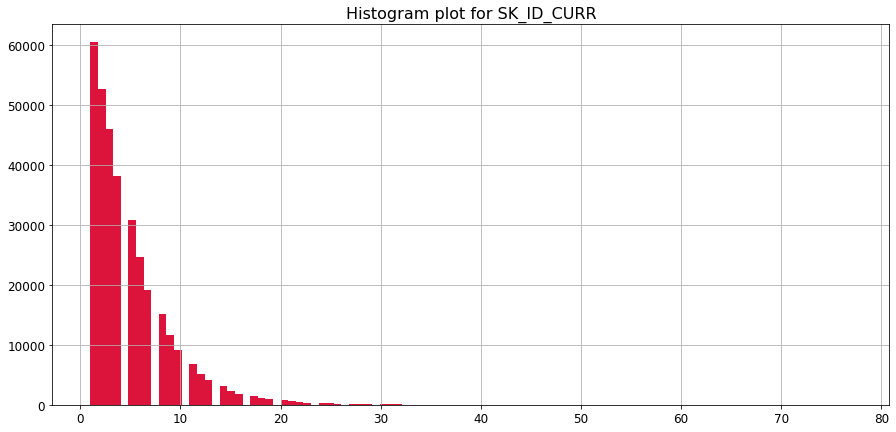

In [86]:
# How many previous applciations  per applicant in the previous_application 
plt.figure(figsize=(15,7))
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications
plt.hist(prevAppCounts[prevAppCounts>=0], bins=100, color='crimson')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('', size=14)
plt.ylabel('', size=14)
plt.title('Histogram plot for SK_ID_CURR', size=16)
plt.grid(b=True)

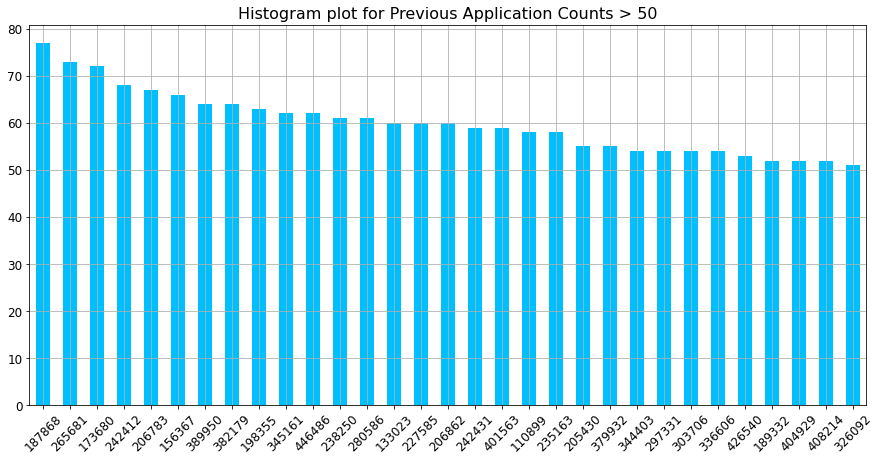

In [87]:
plt.figure(figsize=(15,7))
prevAppCounts[prevAppCounts > 50].plot(kind='bar', color='deepskyblue')
plt.xticks(size=12, rotation=45)
plt.yticks(size=12)
plt.xlabel('', size=14)
plt.ylabel('', size=14)
plt.title('Histogram plot for Previous Application Counts > 50', size=16)
plt.grid(b=True)

### Histogram of Number of previous applications for an ID

In [88]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

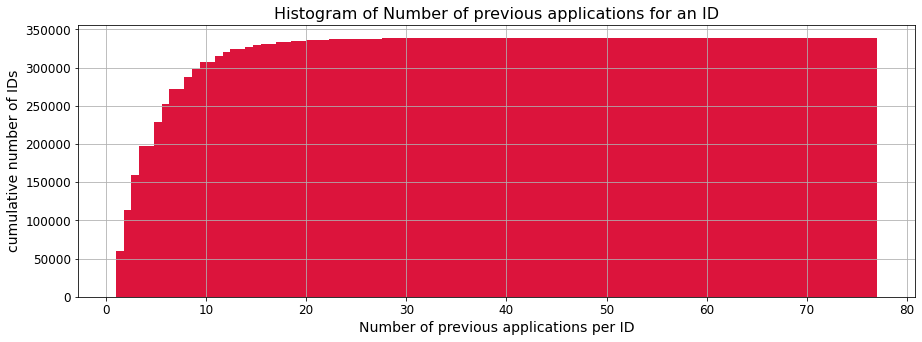

In [89]:
plt.figure(figsize=(15,5))
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100, color='crimson')
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('cumulative number of IDs', size=14)
plt.xlabel('Number of previous applications per ID', size=14)
plt.title('Histogram of Number of previous applications for an ID', size=16)
plt.grid()
plt.show()

##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [90]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


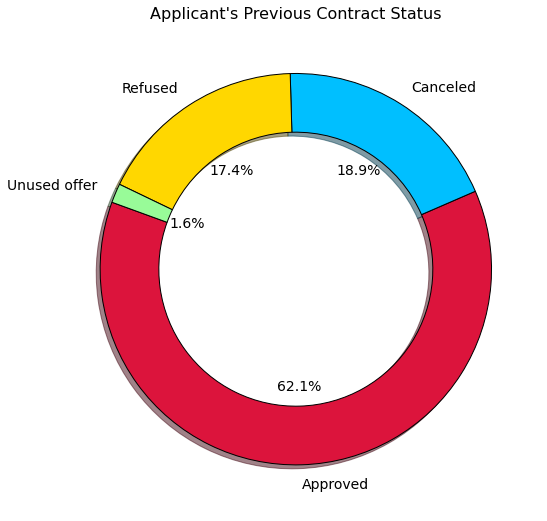

In [91]:
plt.figure(figsize=(9, 9))
plt.pie(x=appsDF['NAME_CONTRACT_STATUS'].value_counts(),
        radius=1.3-0.3,
        labels=appsDF['NAME_CONTRACT_STATUS'].value_counts().index,
        autopct='%1.1f%%',
        colors=['crimson', 'deepskyblue', 'gold', 'palegreen'],
        wedgeprops={"edgecolor":"0", "width":0.3},
        startangle=160,
        shadow=True,
        textprops={'fontsize': 14})
plt.ylabel('', fontsize=14)
plt.title("Applicant's Previous Contract Status", fontsize=16)
plt.show()

### **Observation**

- In previous applications, most of the applicants had their contracts approved. 

- 36% of applicants had their contracts either rejected or cancelled and the rest 1.6% didn't use their contracts at all.

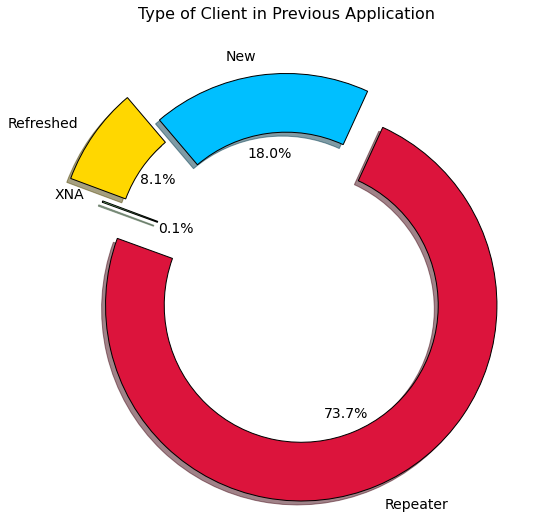

In [92]:
plt.figure(figsize=(9, 9))
plt.pie(x=appsDF['NAME_CLIENT_TYPE'].value_counts(),
        radius=1.3-0.3,
        labels=appsDF['NAME_CLIENT_TYPE'].value_counts().index,
        autopct='%1.1f%%',
        colors=['crimson', 'deepskyblue', 'gold', 'palegreen'],
        explode=[0.2,0,0.2,0],
        wedgeprops={"edgecolor":"0", "width":0.3},
        startangle=160,
        shadow=True,
        textprops={'fontsize': 14})
plt.ylabel('', fontsize=14)
plt.title("Type of Client in Previous Application", fontsize=16)
plt.show()

### **Observation**

- Most of the applicants are repeaters, followed by new applicants and refreshed applicants.

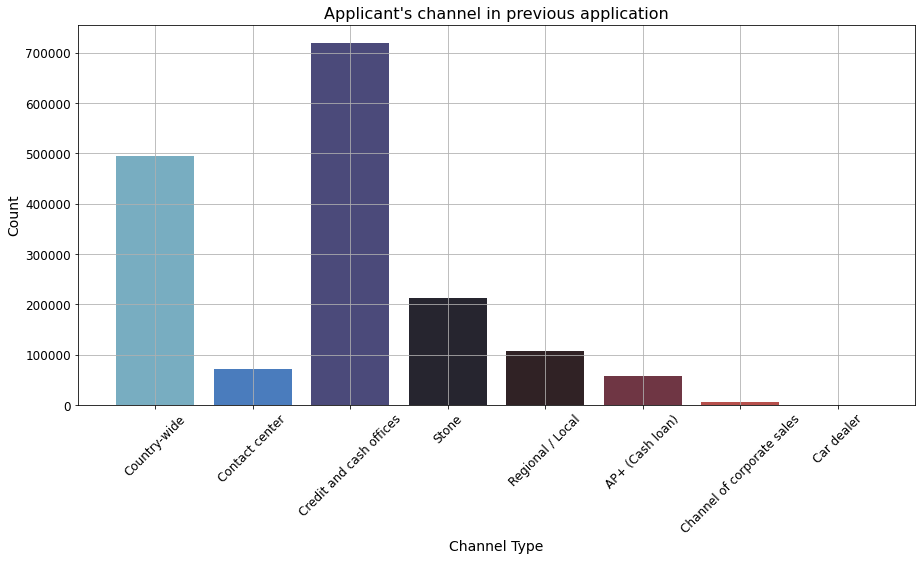

In [93]:
plt.figure(figsize=(15, 7))
sns.countplot(x='CHANNEL_TYPE', data=appsDF, palette='icefire')
plt.title("Applicant's channel in previous application", fontsize=16)
plt.xlabel('Channel Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(b=True)
plt.plot();

### **Observation**

- Previous applicants primarily came through credit and cash offices and least via car dealers.

## **Feature Engineering**

### **Performing Encoding on the Categorical Features of application_train and application_test**

In [94]:
# Label Encoding
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [95]:
# one-hot encoding of features
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [96]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


## Saving the cleaned train and test file for easy future access

In [97]:
# app_train.to_csv('app_train.csv', index=False)

In [98]:
# app_test.to_csv('app_test.csv', index=False)

# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


In [99]:
!pwd

/root/shared/Documents/AML/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission


In [100]:
app_train = pd.read_csv('Data/application_train.csv')
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [101]:
app_test = pd.read_csv('Data/application_test.csv')
app_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [102]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [103]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6         0.0               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
6                       11  ...                  XNA          NaN   

   NAME_YIELD_GROUP  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
6               XNA                 Cash                 NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
6                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
6                       NaN  

[1 rows x 37 columns]

In [104]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]["AMT_CREDIT"]

6    0.0
Name: AMT_CREDIT, dtype: float64

In [105]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704) & ~(appsDF["AMT_CREDIT"]==1.0)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6         0.0               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
6                       11  ...                  XNA          NaN   

   NAME_YIELD_GROUP  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
6               XNA                 Cash                 NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
6                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
6                       NaN  

[1 rows x 37 columns]

## Missing values in prevApps

In [106]:
appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [107]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## feature engineering for prevApp table

In [108]:
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
print(f"{appsDF[features].describe()}")
agg_ops = ["min", "max", "mean"]
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg("mean") #group by ID
display(result.head())
print("-"*50)
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg({'AMT_ANNUITY' : agg_ops, 'AMT_APPLICATION' : agg_ops})
result.columns = result.columns.map('_'.join)
display(result)
result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
print(f"result.shape: {result.shape}")
result[0:10]

        AMT_ANNUITY  AMT_APPLICATION
count  1.297979e+06     1.670214e+06
mean   1.595512e+04     1.752339e+05
std    1.478214e+04     2.927798e+05
min    0.000000e+00     0.000000e+00
25%    6.321780e+03     1.872000e+04
50%    1.125000e+04     7.104600e+04
75%    2.065842e+04     1.803600e+05
max    4.180581e+05     6.905160e+06


SK_ID_CURR    SK_ID_PREV  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0      100001  1.369693e+06     3951.000         24835.50    23787.00   
1      100002  1.038818e+06     9251.775        179055.00   179055.00   
2      100003  2.281150e+06    56553.990        435436.50   484191.00   
3      100004  1.564014e+06     5357.250         24282.00    20106.00   
4      100005  2.176837e+06     4813.200         22308.75    20076.75   

   AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
0            2520.0          24835.5                13.000000   
1               0.0         179055.0                 9.000000   
2            3442.5         435436.5                14.666667   
3            4860.0          24282.0                 5.000000   
4            4464.0          44617.5                10.500000   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  ...  RATE_INTEREST_PRIVILEGED  \
0                     1.0           0.104326  ...                       NaN   
1                     1.0           0.000000  ...                       NaN   
2                     1.0           0.050030  ...                       NaN   
3                     1.0           0.212008  ...                       NaN   
4                     1.0           0.108964  ...                       NaN   

   DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  \
0        -1740.0              23.0          8.0            365243.0   
1         -606.0             500.0         24.0            365243.0   
2        -1305.0             533.0         10.0            365243.0   
3         -815.0              30.0          4.0            365243.0   
4         -536.0              18.0         12.0            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0    -1709.000000               -1499.000000   -1619.000000      -1612.000000   
1     -565.000000                 125.000000     -25.000000        -17.000000   
2    -1274.333333               -1004.333333   -1054.333333      -1047.333333   
3     -784.000000                -694.000000    -724.000000       -714.000000   
4     -706.000000                -376.000000    -466.000000       -460.000000   

   NFLAG_INSURED_ON_APPROVAL  
0                   0.000000  
1                   0.000000  
2                   0.666667  
3                   0.000000  
4                   0.000000  

[5 rows x 21 columns]

--------------------------------------------------


SK_ID_CURR_  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0            100001         3951.000         3951.000       3951.000000   
1            100002         9251.775         9251.775       9251.775000   
2            100003         6737.310        98356.995      56553.990000   
3            100004         5357.250         5357.250       5357.250000   
4            100005         4813.200         4813.200       4813.200000   
...             ...              ...              ...               ...   
338852       456251         6605.910         6605.910       6605.910000   
338853       456252        10074.465        10074.465      10074.465000   
338854       456253         3973.095         5567.715       4770.405000   
338855       456254         2296.440        19065.825      10681.132500   
338856       456255         2250.000        54022.140      20775.391875   

        AMT_APPLICATION_min  AMT_APPLICATION_max  AMT_APPLICATION_mean  
0                   24835.5              24835.5             24835.500  
1                  179055.0             179055.0            179055.000  
2                   68809.5             900000.0            435436.500  
3                   24282.0              24282.0             24282.000  
4                       0.0              44617.5             22308.750  
...                     ...                  ...                   ...  
338852              40455.0              40455.0             40455.000  
338853              57595.5              57595.5             57595.500  
338854              19413.0              28912.5             24162.750  
338855              18846.0             223789.5            121317.750  
338856              45000.0            1170000.0            362770.875  

[338857 rows x 7 columns]

result.shape: (338857, 8)


SK_ID_CURR_  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0       100001         3951.000         3951.000       3951.000000   
1       100002         9251.775         9251.775       9251.775000   
2       100003         6737.310        98356.995      56553.990000   
3       100004         5357.250         5357.250       5357.250000   
4       100005         4813.200         4813.200       4813.200000   
5       100006         2482.920        39954.510      23651.175000   
6       100007         1834.290        22678.785      12278.805000   
7       100008         8019.090        25309.575      15839.696250   
8       100009         7435.845        17341.605      10051.412143   
9       100010        27463.410        27463.410      27463.410000   

   AMT_APPLICATION_min  AMT_APPLICATION_max  AMT_APPLICATION_mean  \
0              24835.5              24835.5          24835.500000   
1             179055.0             179055.0         179055.000000   
2              68809.5             900000.0         435436.500000   
3              24282.0              24282.0          24282.000000   
4                  0.0              44617.5          22308.750000   
5                  0.0             688500.0         272203.260000   
6              17176.5             247500.0         150530.250000   
7                  0.0             450000.0         155701.800000   
8              40455.0             110160.0          76741.714286   
9             247212.0             247212.0         247212.000000   

   range_AMT_APPLICATION  
0                    0.0  
1                    0.0  
2               831190.5  
3                    0.0  
4                44617.5  
5               688500.0  
6               230323.5  
7               450000.0  
8                69705.0  
9                    0.0

In [109]:
result.isna().sum()

SK_ID_CURR_                0
AMT_ANNUITY_min          480
AMT_ANNUITY_max          480
AMT_ANNUITY_mean         480
AMT_APPLICATION_min        0
AMT_APPLICATION_max        0
AMT_APPLICATION_mean       0
range_AMT_APPLICATION      0
dtype: int64

## feature transformer for prevApp table

In [110]:
# class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
#     def __init__(self, features=None): # no *args or **kargs
#         self.features = features
#         self.agg_op_features = {}
#         for f in features:
# #             self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
#             self.agg_op_features[f] =  ["min", "max", "mean"]

#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X, y=None):
#         #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
#         result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
# #         result.columns = result.columns.droplevel()
#         result.columns = ["_".join(x) for x in result.columns.ravel()]

#         result = result.reset_index(level=["SK_ID_CURR"])
#         result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
#         return result # return dataframe with the join key "SK_ID_CURR"

# from sklearn.pipeline import make_pipeline 
# def test_driver_prevAppsFeaturesAggregater(df, features):
#     print(f"df.shape: {df.shape}\n")
#     print(f"df[{features}][0:5]: \n{df[features][0:5]}")
#     test_pipeline = make_pipeline(prevAppsFeaturesAggregater(features))
#     return(test_pipeline.fit_transform(df))
         
# features = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
#             'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
#             'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
#             'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
#             'DAYS_LAST_DUE', 'DAYS_TERMINATION']

# res = test_driver_prevAppsFeaturesAggregater(appsDF, features)
# print(f"HELLO")
# print(f"Test driver: \n{res[0:10]}")
# print(f"input[features][0:10]: \n{appsDF[0:10]}")


In [111]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
# from sklearn.preprocessing import Imputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [112]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [113]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED'])[:20]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2']

In [114]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


In [115]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH',
                                                                                'DAYS_EMPLOYED']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 156)
Testing data with polynomial features shape:   (48744, 156)


In [116]:
app_train_poly['TARGET'] = app_train['TARGET']
app_train_poly.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002         Cash loans           M            N               Y   
1      100003         Cash loans           F            N               N   
2      100004    Revolving loans           M            Y               Y   
3      100006         Cash loans           F            N               Y   
4      100007         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ... EXT_SOURCE_2^2 EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH  \
0  ...                    0.009637               -654.152107   
1  ...                    0.207254              -6491.237078   
2  ...                    0.225464              -5885.942404   
3  ...                    0.226462              -8040.528832   
4  ...                    0.055754              -2076.117157   

  EXT_SOURCE_2 EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH  \
0                    0.005108                          -346.733022   
1                    0.178286                         -5583.975307   
2                    0.295894                         -7724.580288   
3                    0.186365                         -6616.894625   
4                    0.092471                         -3443.335521   

  EXT_SOURCE_2 DAYS_BIRTH^2  EXT_SOURCE_3^3  EXT_SOURCE_3^2 DAYS_BIRTH  \
0              2.353667e+07        0.002707                -183.785678   
1              1.748916e+08        0.153368               -4803.518937   
2              2.016572e+08        0.388325              -10137.567875   
3              2.349331e+08        0.153368               -5445.325225   
4              1.282190e+08        0.153368               -5710.929881   

   EXT_SOURCE_3 DAYS_BIRTH^2  DAYS_BIRTH^3  TARGET  
0               1.247560e+07 -8.468590e+11       1  
1               1.504475e+08 -4.712058e+12       0  
2               2.646504e+08 -6.908939e+12       0  
3               1.933364e+08 -6.864416e+12       0  
4               2.126570e+08 -7.918677e+12       0  

[5 rows x 157 columns]

In [117]:
app_train_poly['TARGET'].head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [118]:
app_test_poly.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... EXT_SOURCE_2^3 EXT_SOURCE_2^2 EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH  \
0  ...       0.492392                    0.099469             -11997.802403   
1  ...       0.024809                    0.036829              -1536.577117   
2  ...       0.342687                    0.299203              -9812.640816   
3  ...       0.132399                    0.159163              -3630.555667   
4  ...       0.077139                    0.096997              -2362.974127   

  EXT_SOURCE_2 EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH  \
0                    0.020094                         -2423.698322   
1                    0.054673                         -2281.043619   
2                    0.261238                         -8567.521115   
3                    0.191336                         -4364.443591   
4                    0.121968                         -2971.298294   

   EXT_SOURCE_2 DAYS_BIRTH^2  EXT_SOURCE_3^3  EXT_SOURCE_3^2 DAYS_BIRTH  \
0               2.923427e+08        0.004059                -489.615795   
1               9.516956e+07        0.081161               -3386.201665   
2               2.809794e+08        0.228089               -7480.393855   
3               9.955450e+07        0.230013               -5246.681115   
4               7.238455e+07        0.153368               -3736.229463   

   EXT_SOURCE_3 DAYS_BIRTH^2  DAYS_BIRTH^3  
0               5.905670e+07 -7.123328e+12  
1               1.412789e+08 -5.894429e+12  
2               2.453261e+08 -8.045687e+12  
3               1.196786e+08 -2.729912e+12  
4               9.101923e+07 -2.217342e+12  

[5 rows x 156 columns]

## Feature Aggregating

## Join the labeled dataset

In [119]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [120]:

# features = ['AMT_ANNUITY', 'AMT_APPLICATION']
# prevApps_feature_pipeline = Pipeline([
#         ('prevApps_add_features1', prevApps_add_features1()),  # add some new features 
#         ('prevApps_add_features2', prevApps_add_features2()),  # add some new features
#         ('prevApps_aggregater', prevAppsFeaturesAggregater()), # Aggregate across old and new features
#     ])


merged_data = app_train_poly #primary dataset
appsDF = datasets["previous_application"] #prev app


merge_all_data = False

# transform all the secondary tables
# 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
# 'previous_application', 'POS_CASH_balance'

if merge_all_data:
    prevApps_aggregated = prevApps_feature_pipeline.transform(appsDF)
    
    #'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
    # 'previous_application', 'POS_CASH_balance'

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    merged_data = merged_data.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
    # merged_data = merged_data.merge(bureau_aggregated, how='left', on='SK_ID_CURR')
    # merged_data = merged_data.merge(ccblance_aggregated, how='left', on='SK_ID_CURR')
    # merged_data = merged_data.merge(installments_pmnts_aggregated, how='left', on='SK_ID_CURR')    

    # 2. Join/Merge in ...... Data
    #X_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # 3. Join/Merge in .....Data
    #dX_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # 4. Join/Merge in Aggregated ...... Data
    #X_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # ......
merged_data.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002         Cash loans           M            N               Y   
1      100003         Cash loans           F            N               N   
2      100004    Revolving loans           M            Y               Y   
3      100006         Cash loans           F            N               Y   
4      100007         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ... EXT_SOURCE_2^2 EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH  \
0  ...                    0.009637               -654.152107   
1  ...                    0.207254              -6491.237078   
2  ...                    0.225464              -5885.942404   
3  ...                    0.226462              -8040.528832   
4  ...                    0.055754              -2076.117157   

  EXT_SOURCE_2 EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH  \
0                    0.005108                          -346.733022   
1                    0.178286                         -5583.975307   
2                    0.295894                         -7724.580288   
3                    0.186365                         -6616.894625   
4                    0.092471                         -3443.335521   

  EXT_SOURCE_2 DAYS_BIRTH^2  EXT_SOURCE_3^3  EXT_SOURCE_3^2 DAYS_BIRTH  \
0              2.353667e+07        0.002707                -183.785678   
1              1.748916e+08        0.153368               -4803.518937   
2              2.016572e+08        0.388325              -10137.567875   
3              2.349331e+08        0.153368               -5445.325225   
4              1.282190e+08        0.153368               -5710.929881   

   EXT_SOURCE_3 DAYS_BIRTH^2  DAYS_BIRTH^3  TARGET  
0               1.247560e+07 -8.468590e+11       1  
1               1.504475e+08 -4.712058e+12       0  
2               2.646504e+08 -6.908939e+12       0  
3               1.933364e+08 -6.864416e+12       0  
4               2.126570e+08 -7.918677e+12       0  

[5 rows x 157 columns]

## Join the unlabeled dataset (i.e., the submission file)

In [121]:
# X_kaggle_test= app_test_poly
# X_kaggle_test = appln_feature_pipeline.fit_transform(X_kaggle_test)

# merge_all_data = True
# if merge_all_data:
#     X_kaggle_test = X_kaggle_test.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
#     # X_kaggle_test = X_kaggle_test.merge(bureau_aggregated, how='left', on="SK_ID_CURR")
#     # X_kaggle_test = X_kaggle_test.merge(ccblance_aggregated, how='left', on="SK_ID_CURR")
#     # X_kaggle_test = X_kaggle_test.merge(installments_pmnts_aggregated, how='left', on="SK_ID_CURR")

In [122]:
app_train_poly.to_csv('app_train_poly.csv', index=False)
app_test_poly.to_csv('app_test_poly.csv', index=False)

# Processing pipeline

In [123]:
# merged_data = pd.read_csv('merged_data_train.csv')
# merged_data.head()

In [124]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# list(merged_data.columns)

Please [this  blog](https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d) for more details of OHE when the validation/test have previously unseen unique values.

In [125]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [126]:
# # Split the provided training data into training and validationa and test
# # The kaggle evaluation test set has no labels

train_dataset=app_train_poly
class_labels = ["No Default","Default"]

from sklearn.model_selection import train_test_split

num_attribs = [
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'EXT_SOURCE_3_x',
'EXT_SOURCE_2_x',
'EXT_SOURCE_1_x',
'EXT_SOURCE_3_y',
'EXT_SOURCE_2_y',
'EXT_SOURCE_1_y',
'DAYS_EMPLOYED',
'FLOORSMAX_AVG',
'FLOORSMAX_MEDI',
'FLOORSMAX_MODE',
'AMT_GOODS_PRICE',
'REGION_POPULATION_RELATIVE',
'ELEVATORS_AVG',
'REG_CITY_NOT_LIVE_CITY',
'FLAG_EMP_PHONE',
'REG_CITY_NOT_WORK_CITY',
'DAYS_ID_PUBLISH',
'DAYS_LAST_PHONE_CHANGE',
'REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'1',
'EXT_SOURCE_1_y',
'EXT_SOURCE_2_y',
'EXT_SOURCE_3_y',
'DAYS_BIRTH_y',
'EXT_SOURCE_1^2',
'EXT_SOURCE_1 EXT_SOURCE_2',
'EXT_SOURCE_1 EXT_SOURCE_3',
'EXT_SOURCE_1 DAYS_BIRTH',
'EXT_SOURCE_2^2',
'EXT_SOURCE_2 EXT_SOURCE_3',
'EXT_SOURCE_2 DAYS_BIRTH',
'EXT_SOURCE_3^2',
'EXT_SOURCE_3 DAYS_BIRTH',
'DAYS_BIRTH^2',
'EXT_SOURCE_1^3',
'EXT_SOURCE_1^2 EXT_SOURCE_2',
'EXT_SOURCE_1^2 EXT_SOURCE_3',
'EXT_SOURCE_1^2 DAYS_BIRTH',
'EXT_SOURCE_1 EXT_SOURCE_2^2',
'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
'EXT_SOURCE_1 EXT_SOURCE_3^2',
'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
'EXT_SOURCE_1 DAYS_BIRTH^2',
'EXT_SOURCE_2^3',
'EXT_SOURCE_2^2 EXT_SOURCE_3',
'EXT_SOURCE_2^2 DAYS_BIRTH',
'EXT_SOURCE_2 EXT_SOURCE_3^2',
'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
'EXT_SOURCE_2 DAYS_BIRTH^2',
'EXT_SOURCE_3^3',
'EXT_SOURCE_3^2 DAYS_BIRTH',
'EXT_SOURCE_3 DAYS_BIRTH^2',
'DAYS_BIRTH^3']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
    ])


cat_attribs = ['FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR']

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ]) 

selected_features = num_attribs + cat_attribs
total_features = f"{len(selected_features)}:   Num:{len(num_attribs)},    Cat:{len(cat_attribs)}"
#Total Feature selected for processing
total_features

# use_application_data_ONLY = False #use joined data
# if use_application_data_ONLY:
#     # just selected a few features for a baseline experiment
#     selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
#         'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
#                    'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
#     X_train = datasets["application_train"][selected_features]
#     y_train = datasets["application_train"]['TARGET']
#     X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
#     X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
#     X_kaggle_test= datasets["application_test"][selected_features]
#     # y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

# selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
#         'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
#                    'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
# y_train = X_train['TARGET']
# X_train = X_train[selected_features]
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
# X_kaggle_test= X_kaggle_test[selected_features]
# # y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

    
# print(f"X train           shape: {X_train.shape}")
# print(f"X validation      shape: {X_valid.shape}")
# print(f"X test            shape: {X_test.shape}")
# print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

'67:   Num:63,    Cat:4'

In [127]:
# list(train_dataset.columns)

In [128]:
X_train = train_dataset[selected_features]
y_train = app_train_poly["TARGET"]
X_kaggle_test = app_test_poly[selected_features]

subsample_rate = 0.3

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train,
                                                    test_size=subsample_rate, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,
                                                      test_size=0.15, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (182968, 67)
X validation      shape: (32289, 67)
X test            shape: (92254, 67)
X X_kaggle_test   shape: (48744, 67)


In [129]:
# from sklearn.base import BaseEstimator, TransformerMixin
# import re

# # Creates the following date features
# # But could do so much more with these features
# #    E.g., 
# #      extract the domain address of the homepage and OneHotEncode it
# # 
# # ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
# class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
#     def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
#         self.features = features
#     def fit(self, X, y=None):
#         return self  # nothing else to do
#     def transform(self, X):
#         df = pd.DataFrame(X, columns=self.features)
#         #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
#         df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
#         #df.drop(self.features, axis=1, inplace=True)
#         return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

# from sklearn.pipeline import make_pipeline 
# features = ["OCCUPATION_TYPE"]
# def test_driver_prep_OCCUPATION_TYPE():
#     print(f"X_train.shape: {X_train.shape}\n")
#     print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
#     test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
#     return(test_pipeline.fit_transform(X_train))
          
# x = test_driver_prep_OCCUPATION_TYPE()
# print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
# print(f"X_train['name'][0:10]: \n{X_train[features][0:10]}")


# # QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


In [130]:
# # Create a class to select numerical or categorical columns 
# # since Scikit-Learn doesn't handle DataFrames yet
# class DataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attribute_names):
#         self.attribute_names = attribute_names
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[self.attribute_names].values

In [131]:
# # Identify the numeric features we wish to consider. 
# num_attribs = [
#     'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
#     'EXT_SOURCE_2','EXT_SOURCE_3']

# num_pipeline = Pipeline([
#         ('selector', DataFrameSelector(num_attribs)),
#         ('imputer', SimpleImputer(strategy='mean')),
#         ('std_scaler', StandardScaler()),
#     ])
# # Identify the categorical features we wish to consider.
# cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
#                'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# # Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# # do NOT occur in the training set
# cat_pipeline = Pipeline([
#         ('selector', DataFrameSelector(cat_attribs)),
#         #('imputer', SimpleImputer(strategy='most_frequent')),
#         ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#         ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
#     ])

# data_prep_pipeline = FeatureUnion(transformer_list=[
#         ("num_pipeline", num_pipeline),
#         ("cat_pipeline", cat_pipeline),
#     ])
              



In [132]:
# list(datasets["application_train"].columns)

# Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [133]:
def pct(x):
    return round(100*x,3)

In [134]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Model name",
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Train F1", 
                                   "Valid F1",
                                   "Test F1",
                                   "Fit Time"
                                  ])
expLog

Empty DataFrame
Columns: [exp_name, Model name, Train Acc, Valid Acc, Test  Acc, Train AUC, Valid AUC, Test  AUC, Train F1, Valid F1, Test F1, Fit Time]
Index: []

In [135]:
import time 
np.random.seed(42)
start_time = time.time()
model_name = "linear"
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        (model_name, LogisticRegression())
    ])
model = full_pipeline_with_predictor.fit(X_train, y_train)
fit_time = time.time() - start_time

Accuracy Score on Train Dataset: 0.919
F1 Score on Train Dataset: 0.007
Confusion Matrix for Training Set


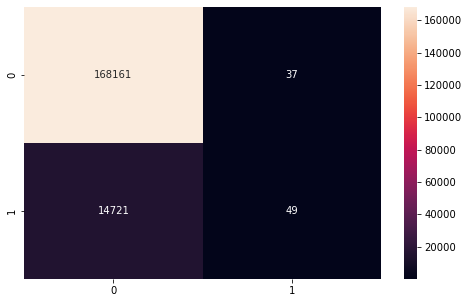

Confusion Matrix for Validation Set


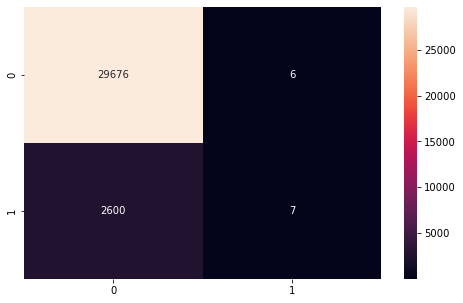

Confusion Matrix for Test Set


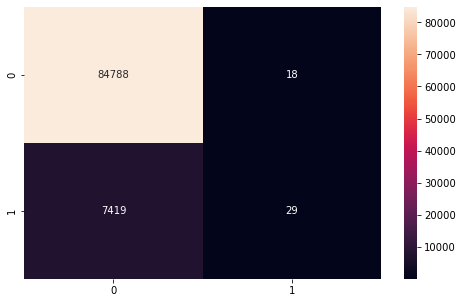

AUC-ROC for Train Set


<Figure size 720x576 with 0 Axes>

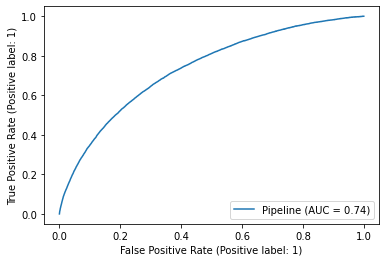

AUC-ROC for Valid Set


<Figure size 720x576 with 0 Axes>

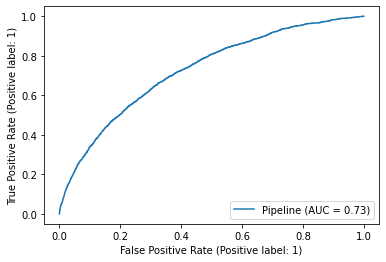

AUC-ROC for Test Set


<Figure size 720x576 with 0 Axes>

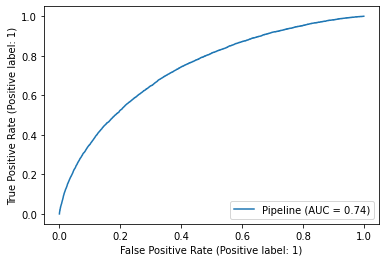

In [136]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_roc_curve

print('Accuracy Score on Train Dataset:', np.round(accuracy_score(y_train, model.predict(X_train)), 3))
print('F1 Score on Train Dataset:', np.round(f1_score(y_train, model.predict(X_train)), 3))
cf_train = confusion_matrix(y_train, model.predict(X_train))
cf_val = confusion_matrix(y_valid, model.predict(X_valid))
cf_test = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize=(8,5))
print('Confusion Matrix for Training Set')
sns.heatmap(cf_train, annot=True, fmt='g')
plt.show()
plt.figure(figsize=(8,5))
print('Confusion Matrix for Validation Set')
sns.heatmap(cf_val, annot=True, fmt='g')
plt.show()
plt.figure(figsize=(8,5))
print('Confusion Matrix for Test Set')
sns.heatmap(cf_test, annot=True, fmt='g')
plt.show()
plt.figure(figsize=(10,8))
print('AUC-ROC for Train Set')
plot_roc_curve(model, X_train, y_train);
plt.show()
plt.figure(figsize=(10,8))
print('AUC-ROC for Valid Set')
plot_roc_curve(model, X_valid, y_valid);
plt.show()
plt.figure(figsize=(10,8))
print('AUC-ROC for Test Set')
plot_roc_curve(model, X_test, y_test);
plt.show()

## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [137]:
from sklearn.metrics import roc_auc_score
print('Accuracy Score on Train Dataset:', roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]))

Accuracy Score on Train Dataset: 0.7350907411786491


In [138]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.7361048726286086

In [139]:
exp_name = f"Baseline_{len(selected_features)}_features"
    
expLog.loc[len(expLog)] = [f"{exp_name}"] + [model_name] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)), 
                f1_score(y_valid, model.predict(X_valid)),
                f1_score(y_test, model.predict(X_test)),
                fit_time], 4))
expLog    

exp_name Model name  Train Acc  Valid Acc  Test  Acc  \
0  Baseline_67_features     linear     0.9193     0.9193     0.9194   

   Train AUC  Valid AUC  Test  AUC  Train F1  Valid F1  Test F1  Fit Time  
0     0.7351     0.7275     0.7361    0.0066    0.0053   0.0077     3.466

### THE BIG RACE (Baseline Models)

In [140]:

try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Model name",
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Train F1", 
                                   "Valid F1",
                                   "Test F1",
                                   "Fit Time (seconds)"
                                  ])
expLog

exp_name Model name  Train Acc  Valid Acc  Test  Acc  \
0  Baseline_67_features     linear     0.9193     0.9193     0.9194   

   Train AUC  Valid AUC  Test  AUC  Train F1  Valid F1  Test F1  Fit Time  
0     0.7351     0.7275     0.7361    0.0066    0.0053   0.0077     3.466

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#### Using Non-Ensemble Models

Fit Time for Baseline LogisticRegression is: 3.728224992752075 seconds
Baseline LogisticRegression
Confusion Matrix for Training Set


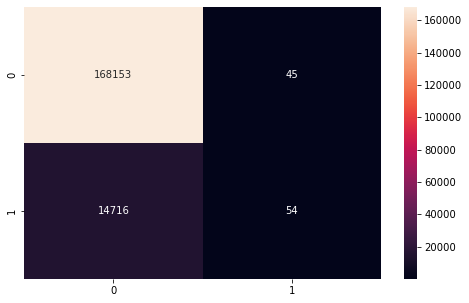

Confusion Matrix for Validation Set


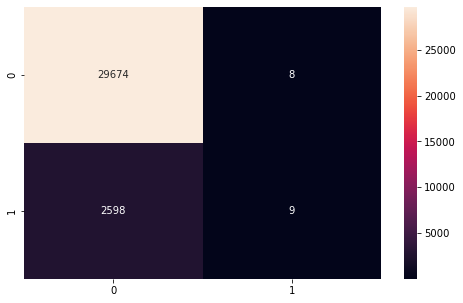

Confusion Matrix for Test Set


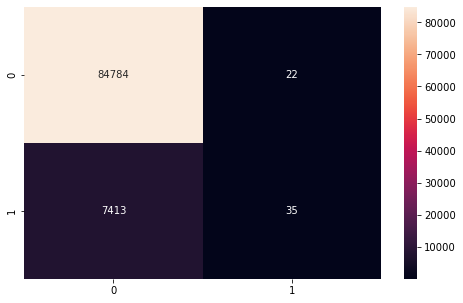

AUC-ROC for Train Set


<Figure size 720x576 with 0 Axes>

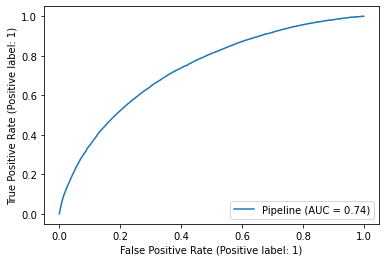

AUC-ROC for Valid Set


<Figure size 720x576 with 0 Axes>

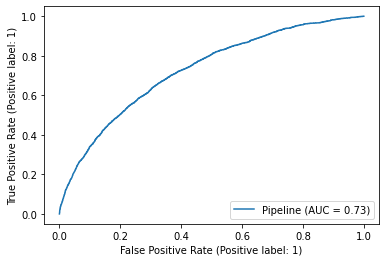

AUC-ROC for Test Set


<Figure size 720x576 with 0 Axes>

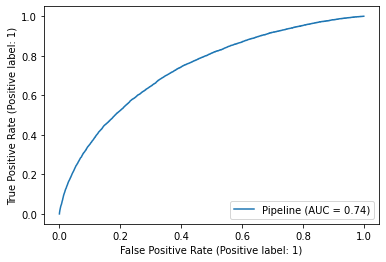

Fit Time for Baseline LogisticRegression is: 4.508942604064941 seconds
Baseline LogisticRegression
Confusion Matrix for Training Set


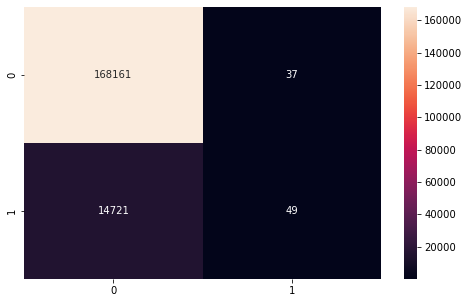

Confusion Matrix for Validation Set


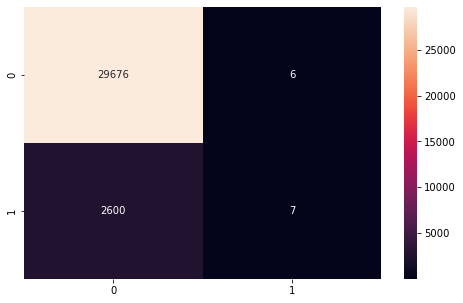

Confusion Matrix for Test Set


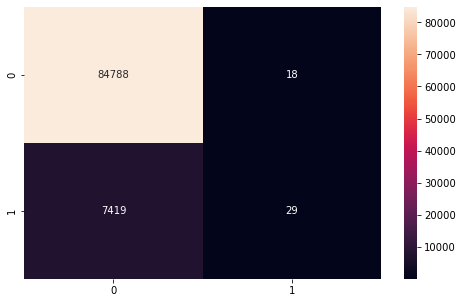

AUC-ROC for Train Set


<Figure size 720x576 with 0 Axes>

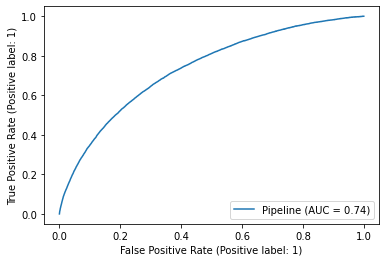

AUC-ROC for Valid Set


<Figure size 720x576 with 0 Axes>

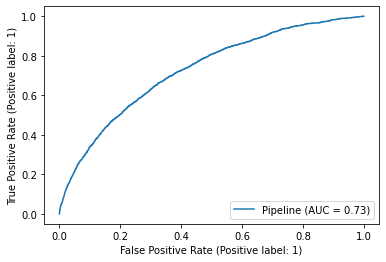

AUC-ROC for Test Set


<Figure size 720x576 with 0 Axes>

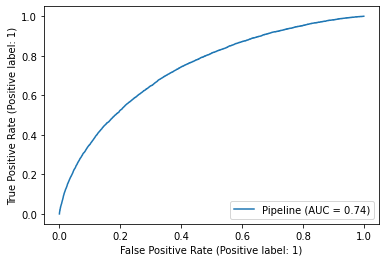

Fit Time for Baseline DecisionTreeClassifier is: 16.717386722564697 seconds
Baseline DecisionTreeClassifier
Confusion Matrix for Training Set


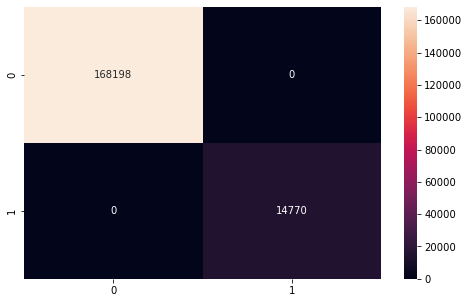

Confusion Matrix for Validation Set


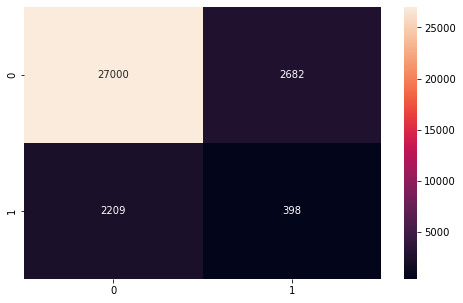

Confusion Matrix for Test Set


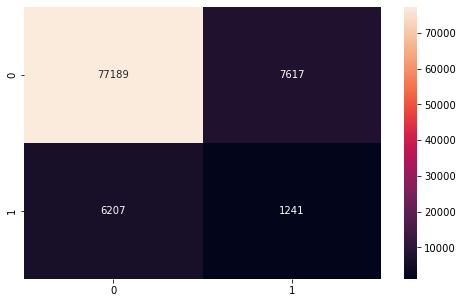

AUC-ROC for Train Set


<Figure size 720x576 with 0 Axes>

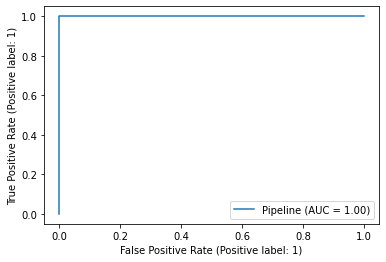

AUC-ROC for Valid Set


<Figure size 720x576 with 0 Axes>

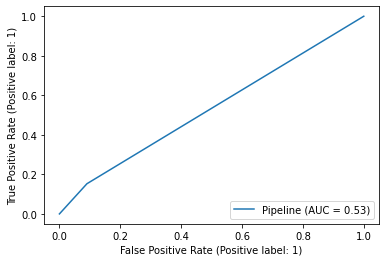

AUC-ROC for Test Set


<Figure size 720x576 with 0 Axes>

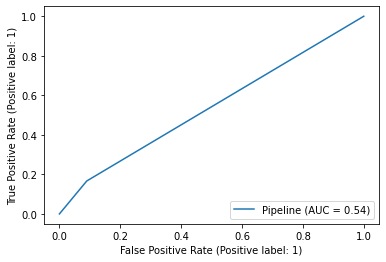

Fit Time for Baseline GaussianNB is: 1.5385351181030273 seconds
Baseline GaussianNB
Confusion Matrix for Training Set


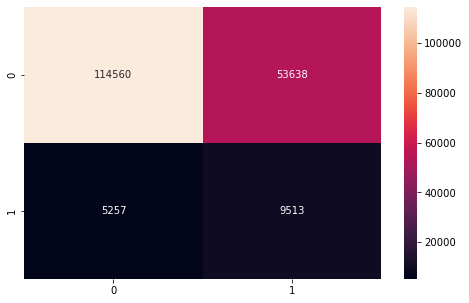

Confusion Matrix for Validation Set


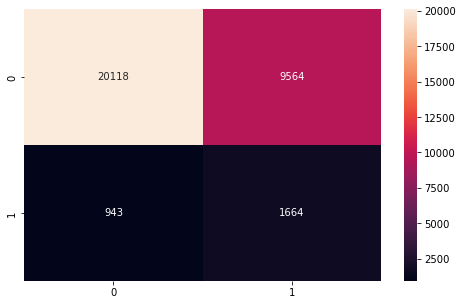

Confusion Matrix for Test Set


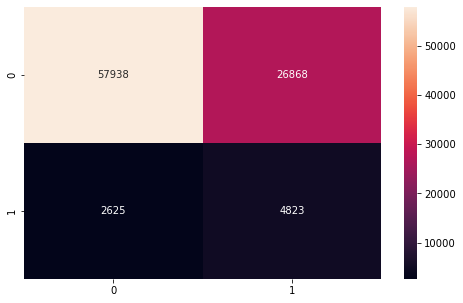

AUC-ROC for Train Set


<Figure size 720x576 with 0 Axes>

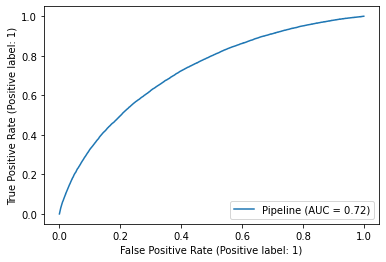

AUC-ROC for Valid Set


<Figure size 720x576 with 0 Axes>

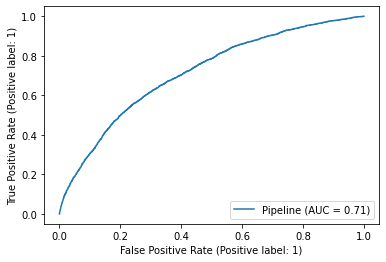

AUC-ROC for Test Set


<Figure size 720x576 with 0 Axes>

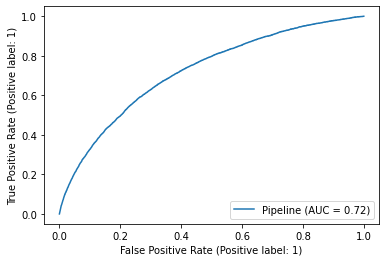

exp_name                       Model name  Train Acc  \
0  Baseline_67_features                           linear     0.9193   
1  Baseline_67_features      Baseline LogisticRegression     0.9193   
2  Baseline_67_features      Baseline LogisticRegression     0.9193   
3  Baseline_67_features  Baseline DecisionTreeClassifier     1.0000   
4  Baseline_67_features              Baseline GaussianNB     0.6781   

   Valid Acc  Test  Acc  Train AUC  Valid AUC  Test  AUC  Train F1  Valid F1  \
0     0.9193     0.9194     0.7351     0.7275     0.7361    0.0066    0.0053   
1     0.9193     0.9194     0.7351     0.7273     0.7361    0.0073    0.0069   
2     0.9193     0.9194     0.7351     0.7275     0.7361    0.0066    0.0053   
3     0.8485     0.8502     1.0000     0.5312     0.5384    1.0000    0.1400   
4     0.6746     0.6803     0.7219     0.7148     0.7216    0.2442    0.2405   

   Test F1  Fit Time  
0   0.0077    3.4660  
1   0.0093    3.7282  
2   0.0077    4.5089  
3   0.1522   16.7174  
4   0.2465    1.5385

In [142]:
clfs = [LogisticRegression(penalty='none'),
        LogisticRegression(penalty='l2'),
        DecisionTreeClassifier(),
        GaussianNB()]

for clf in clfs:
    start_time = time.time()
    full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("model", clf)
    ])
    model_name = "Baseline {}".format(type(full_pipeline_with_predictor['model']).__name__)
    model = full_pipeline_with_predictor.fit(X_train, y_train)
    fit_time = time.time() - start_time
    print('Fit Time for {} is: {} seconds'.format(model_name, fit_time))
    exp_name = f"Baseline_{len(selected_features)}_features"
    print(model_name)
    expLog.loc[len(expLog)] = [f"{exp_name}"] + [model_name] + list(np.round(
                   [accuracy_score(y_train, model.predict(X_train)), 
                    accuracy_score(y_valid, model.predict(X_valid)),
                    accuracy_score(y_test, model.predict(X_test)),
                    roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                    roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                    roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                    f1_score(y_train, model.predict(X_train)), 
                    f1_score(y_valid, model.predict(X_valid)),
                    f1_score(y_test, model.predict(X_test)),
                    fit_time], 4))
    cf_train = confusion_matrix(y_train, model.predict(X_train))
    cf_val = confusion_matrix(y_valid, model.predict(X_valid))
    cf_test = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(8,5))
    print('Confusion Matrix for Training Set')
    sns.heatmap(cf_train, annot=True, fmt='g')
    plt.show()
    plt.figure(figsize=(8,5))
    print('Confusion Matrix for Validation Set')
    sns.heatmap(cf_val, annot=True, fmt='g')
    plt.show()
    plt.figure(figsize=(8,5))
    print('Confusion Matrix for Test Set')
    sns.heatmap(cf_test, annot=True, fmt='g')
    plt.show()
    plt.figure(figsize=(10,8))
    print('AUC-ROC for Train Set')
    plot_roc_curve(model, X_train, y_train);
    plt.show()
    plt.figure(figsize=(10,8))
    print('AUC-ROC for Valid Set')
    plot_roc_curve(model, X_valid, y_valid);
    plt.show()
    plt.figure(figsize=(10,8))
    print('AUC-ROC for Test Set')
    plot_roc_curve(model, X_test, y_test);
    plt.show()

expLog    

#### Using Ensemble Models

Fit Time for Baseline RandomForestClassifier is: 94.62712383270264 seconds
Baseline RandomForestClassifier
Confusion Matrix for Training Set


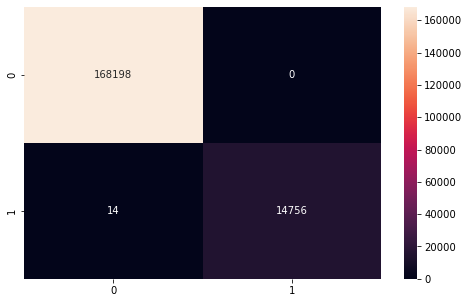

Confusion Matrix for Validation Set


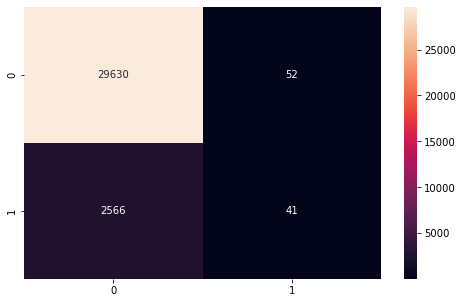

Confusion Matrix for Test Set


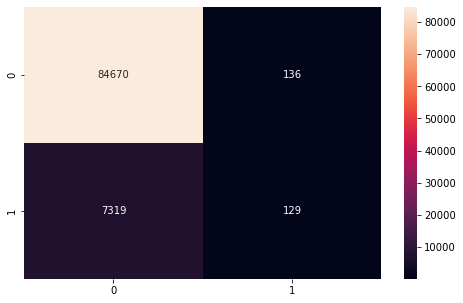

AUC-ROC for Train Set


<Figure size 720x576 with 0 Axes>

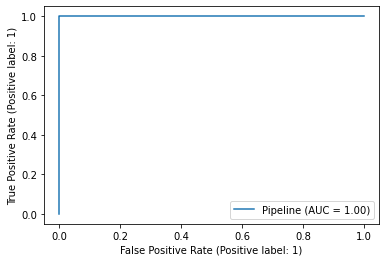

AUC-ROC for Valid Set


<Figure size 720x576 with 0 Axes>

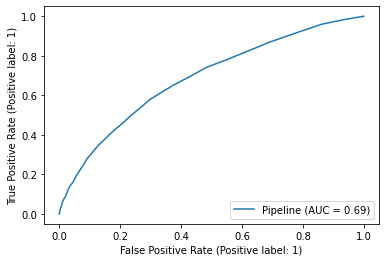

AUC-ROC for Test Set


<Figure size 720x576 with 0 Axes>

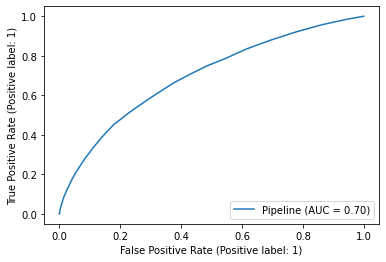

[00:32:35] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit Time for Baseline XGBClassifier is: 16.9883451461792 seconds
Baseline XGBClassifier
Confusion Matrix for Training Set


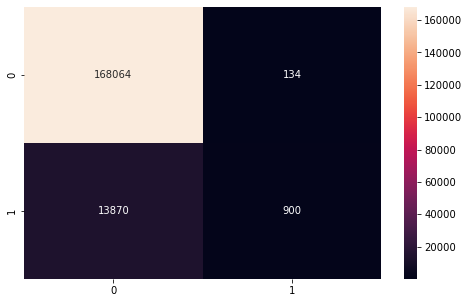

Confusion Matrix for Validation Set


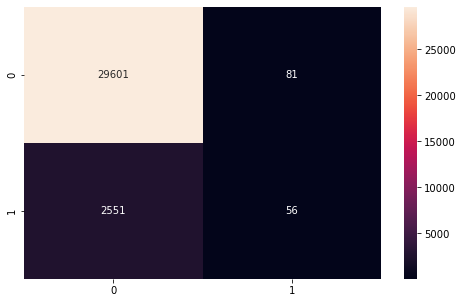

Confusion Matrix for Test Set


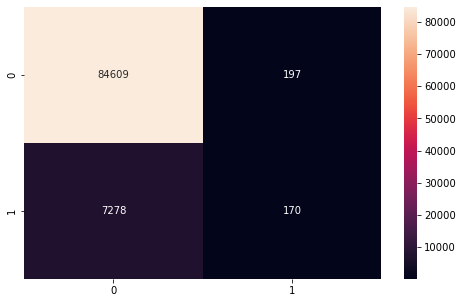

AUC-ROC for Train Set


<Figure size 720x576 with 0 Axes>

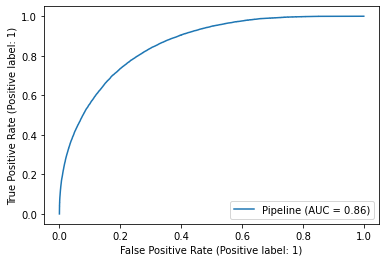

AUC-ROC for Valid Set


<Figure size 720x576 with 0 Axes>

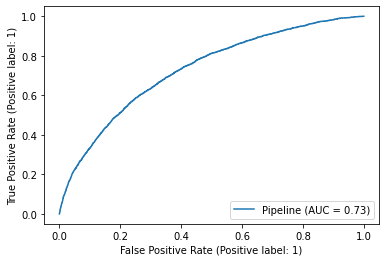

AUC-ROC for Test Set


<Figure size 720x576 with 0 Axes>

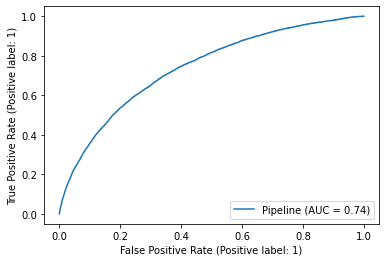

In [143]:
clfs = [RandomForestClassifier(), XGBClassifier()]

for clf in clfs:
    start_time = time.time()
    full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("model", clf)
    ])
    model_name = "Baseline {}".format(type(full_pipeline_with_predictor['model']).__name__)
    model = full_pipeline_with_predictor.fit(X_train, y_train)
    fit_time = time.time() - start_time
    print('Fit Time for {} is: {} seconds'.format(model_name, fit_time))
    exp_name = f"Baseline_{len(selected_features)}_features"
    print(model_name)
    expLog.loc[len(expLog)] = [f"{exp_name}"] + [model_name] + list(np.round(
                   [accuracy_score(y_train, model.predict(X_train)), 
                    accuracy_score(y_valid, model.predict(X_valid)),
                    accuracy_score(y_test, model.predict(X_test)),
                    roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                    roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                    roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                    f1_score(y_train, model.predict(X_train)), 
                    f1_score(y_valid, model.predict(X_valid)),
                    f1_score(y_test, model.predict(X_test)),
                    fit_time], 4))
    cf_train = confusion_matrix(y_train, model.predict(X_train))
    cf_val = confusion_matrix(y_valid, model.predict(X_valid))
    cf_test = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(8,5))
    print('Confusion Matrix for Training Set')
    sns.heatmap(cf_train, annot=True, fmt='g')
    plt.show()
    plt.figure(figsize=(8,5))
    print('Confusion Matrix for Validation Set')
    sns.heatmap(cf_val, annot=True, fmt='g')
    plt.show()
    plt.figure(figsize=(8,5))
    print('Confusion Matrix for Test Set')
    sns.heatmap(cf_test, annot=True, fmt='g')
    plt.show()
    plt.figure(figsize=(10,8))
    print('AUC-ROC for Train Set')
    plot_roc_curve(model, X_train, y_train);
    plt.show()
    plt.figure(figsize=(10,8))
    print('AUC-ROC for Valid Set')
    plot_roc_curve(model, X_valid, y_valid);
    plt.show()
    plt.figure(figsize=(10,8))
    print('AUC-ROC for Test Set')
    plot_roc_curve(model, X_test, y_test);
    plt.show()

In [144]:
expLog

exp_name                       Model name  Train Acc  \
0  Baseline_67_features                           linear     0.9193   
1  Baseline_67_features      Baseline LogisticRegression     0.9193   
2  Baseline_67_features      Baseline LogisticRegression     0.9193   
3  Baseline_67_features  Baseline DecisionTreeClassifier     1.0000   
4  Baseline_67_features              Baseline GaussianNB     0.6781   
5  Baseline_67_features  Baseline RandomForestClassifier     0.9999   
6  Baseline_67_features           Baseline XGBClassifier     0.9235   

   Valid Acc  Test  Acc  Train AUC  Valid AUC  Test  AUC  Train F1  Valid F1  \
0     0.9193     0.9194     0.7351     0.7275     0.7361    0.0066    0.0053   
1     0.9193     0.9194     0.7351     0.7273     0.7361    0.0073    0.0069   
2     0.9193     0.9194     0.7351     0.7275     0.7361    0.0066    0.0053   
3     0.8485     0.8502     1.0000     0.5312     0.5384    1.0000    0.1400   
4     0.6746     0.6803     0.7219     0.7148     0.7216    0.2442    0.2405   
5     0.9189     0.9192     1.0000     0.6871     0.6972    0.9995    0.0304   
6     0.9185     0.9190     0.8579     0.7300     0.7395    0.1139    0.0408   

   Test F1  Fit Time  
0   0.0077    3.4660  
1   0.0093    3.7282  
2   0.0077    4.5089  
3   0.1522   16.7174  
4   0.2465    1.5385  
5   0.0335   94.6271  
6   0.0435   16.9883

#### KNeighborsClassifier, SVC, and Logistic Regression with L1 regularization with solver='liblinear' take a lot of time to run and crash the kernel. So we were unable to train the dataset on these models.

In [145]:
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# clfs = [SVC(), KNeighborsClassifier()]

# for clf in clfs:
#     start_time = time.time()
#     full_pipeline_with_predictor = Pipeline([
#         ("preparation", data_prep_pipeline),
#         ("model", clf)
#     ])
#     model_name = "Baseline {}".format(type(full_pipeline_with_predictor['model']).__name__)
#     model = full_pipeline_with_predictor.fit(X_train, y_train)
#     fit_time = time.time() - start_time
#     print('Fit Time for {} is: {} seconds'.format(model_name, fit_time))
#     exp_name = f"Baseline_{len(selected_features)}_features"
    
#     expLog.loc[len(expLog)] = [f"{exp_name}"] + [model_name] + list(np.round(
#                    [accuracy_score(y_train, model.predict(X_train)), 
#                     accuracy_score(y_valid, model.predict(X_valid)),
#                     accuracy_score(y_test, model.predict(X_test)),
#                     roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
#                     roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
#                     roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
#                     f1_score(y_train, model.predict(X_train)), 
#                     f1_score(y_valid, model.predict(X_valid)),
#                     f1_score(y_test, model.predict(X_test)),
#                     fit_time], 4))
# expLog 

## Grid Search

In [154]:
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

In [155]:
sub_X_train = X_train[:15000]
sub_y_train = y_train[:15000]

In [159]:
clf_pipe = Pipeline([("preparation", data_prep_pipeline),
        ("classifier", None)]) # Placeholder Estimator


parameters = [#{'classifier__n_estimators': [100,200,300], 'classifier__max_depth': [5,7,10], 'classifier__subsample': [0.6,0.8,1], 'classifier__colsample_bytree': [0.5,0.75,1], 'classifier__alpha': [0,1], 'classifier__lambda': [0,1], 'classifier__gamma': [1,10], 'classifier__eval_metric': ['logloss'], 'classifier': [XGBClassifier(use_label_encoder=False)]},
    {'classifier__n_estimators': [200], 'classifier__max_depth': [7], 'classifier__subsample': [0.6], 'classifier__colsample_bytree': [1], 'classifier__alpha': [1], 'classifier__lambda': [1], 'classifier__gamma': [1], 'classifier__eval_metric': ['logloss'], 'classifier': [XGBClassifier(use_label_encoder=False)]},
               #{'classifier__n_iter_no_change': [5], 'classifier__n_estimators': [100,200,300], 'classifier__min_samples_leaf': [2,5,10], 'classifier__max_depth': [3,5,7], 'classifier__subsample': [0.6,0.8,1], 'classifier': [GradientBoostingClassifier()]},
               #{'classifier__penalty':['l1','l2','elasticnet'], 'classifier__solver': ['saga'], 'classifier__C':[1,10], 'classifier__n_jobs': [-1], 'classifier': [LogisticRegression()]},
               {'classifier__n_estimators': [100,200,300], 'classifier__max_depth': [5,7,10, None], 'classifier__min_samples_leaf': [2,5,10], 'classifier__n_jobs': [-1], 'classifier': [RandomForestClassifier()]},
               {'classifier__max_depth': [5,7,10, None], 'classifier__min_samples_leaf': [2,5,10], 'classifier': [DecisionTreeClassifier()]},
                {'classifier': [GaussianNB()]}
               ]

clf_gridsearch = GridSearchCV(clf_pipe, param_grid = parameters, cv = 5, scoring='f1', n_jobs=-1)
clf_gridsearch.fit(sub_X_train, sub_y_train)

KeyboardInterrupt: 

In [ ]:
print(clf_gridsearch.best_params_)
print(clf_gridsearch.best_score_)
y_pred = clf_gridsearch.predict(X_valid)
print(f1_score(y_valid, y_pred))

In [ ]:
results = pd.DataFrame(clf_gridsearch.cv_results_)
top_GNB = results.sort_values(by='rank_test_score')
top_GNB.to_csv('top_gridsearch_results_GNB.csv')

In [ ]:
# models = VotingClassifier(estimators=[('xgb', XGBClassifier()), ('booster', GradientBoostingClassifier()),
#         ('logistic', LogisticRegression()), ('rfc', RandomForestClassifier()),
#         ('tree', DecisionTreeClassifier())], voting='soft')
                                     
               
# clf_pipe = Pipeline([("preparation", data_prep_pipeline), ('model', models)]) # Placeholder Estimator

# parameters = {'model__xgb__n_estimators': [100,200,300], 'model__xgb__max_depth': [5,7,10], 'model__xgb__subsample': [0.6,0.8,1], 'model__xgb__colsample_bytree': [0.5,0.75,1], 'model__xgb__reg_alpha': [0,1], 'model__xgb__reg_lambda': [0,1], 'model__xgb__gamma': [1,10], 'model__xgb__eval_metric': ['logloss'],
#                'model__booster__n_iter_no_change': [5], 'model__booster__n_estimators': [100,200,300], 'model__booster__min_samples_leaf': [2,5,10], 'model__booster__max_depth': [3,5,7], 'model__booster__subsample': [0.6,0.8,1],
#                'model__logistic__penalty':['l1','l2','elasticnet'], 'model__logistic__solver': ['saga'], 'model__logistic__C':[1,10], 'model__logistic__n_jobs': [-1],
#                'model__rfc__n_estimators': [100,200,300], 'model__rfc__max_depth': [5,7,10, None], 'model__rfc__min_samples_leaf': [2,5,10], 'model__rfc__n_jobs': [-1],
#                'model__tree__max_depth': [5,7,10, None], 'model__tree__min_samples_leaf': [2,5,10]}

    
# # Candidate learning estimators
# # estimators = [{'clf': [LogisticRegression(penalty='l2')]},
# #                 {'clf': [RandomForestClassifier()]},
# #                 {'clf': [XGBClassifier()]}
# #                ]


# clf_gridsearch = GridSearchCV(clf_pipe, param_grid = parameters, cv = 5, scoring='f1', n_jobs=-1)
# clf_gridsearch.fit(sub_x_train, sub_y_train)
# results = pd.DataFrame(clf_gridsearch.cv_results_)
# top = results.sort_values(by='rank_test_score')
# print(top[:10]['param_classifier'].iloc[0])
# print(clf_gridsearch.best_params_)

In order to efficiently perform a hyperparameter tuning grid search, we needed to use a round-about method. Our goal for the hyperparameter tuning was to find which classifier worked the best, and with what hyperparameters. We tested logistic regression (LogisticRegression), random forests (RandomForestClassifier), decision trees (DecisionTreeClassifier), the GradientBoostingClassifier, and lastly the XGBoostClassifier. Of these, random forests, gradient boosting, and the XGBoost were ensemble methods. Additionally, we tested many hyperparameters for each of these models. We used the Scikit-Learn library's GridsearchCV to run our grid search.

For logistic regression, we tested the penalty type and the penalty coefficient. For random forests, we tested the number of trees, the max depth of each tree, and the minimum number of samples allowed for each leaf node. For decision trees, we tested the max depth and the minimum samples for leaf nodes. With the gradient boosting classifier, we tested the number of trees, the minimum samples for leaf nodes, the max depth, and the subsample parameter that controls the proportion of samples to be used to fit each tree. Finally, with the XGBoost classifier, we tested the number of trees, the max depth, the subsample, a 'colsample_bytree' parameter which controls the proportion of columns used to construct each tree, the alpha determining the amount of L1 regularization, the lambda for L2 regularization, and gamma, which determines how much loss reduction is needed to partition further down the tree. 

Some of these classifiers take a lot of time to train, causing us to take an alternative approach. We tested all classifiers with all parameters on 5000 training examples. From this, we found that decision trees were the most effective, while XGBoost was second. Since XGBoost seemed to have the largest effect on the speed of the grid search, so we took the best performing XGBoost parameters and used those to compare to the other classifiers and their parameters. This time, we used 15000 examples. Again, decision tree proved the best performing. Since the GradientBoostingClassifier and the LogisticRegression consistently performed worse than decision trees and XGBoost, we took them out of our final grid search. We kept the RandomForestClassifier since we wanted to see if more training examples led to random forests overcoming decision trees, which is the result we would have expected from the beginning. For the final search, we utilized all the training data. The results had the DecisionTreeClassifier on top once again. 

The final parameters for this grid search that yielded the best performance were the DecisionTreeClassifier with no max depth and a minimum number of samples for leaf nodes of 5. 

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

### Using Logistic Regression (Ridge) for our baseline submission on Kaggle

In [57]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression(penalty='l2'))
    ])
model = full_pipeline_with_predictor.fit(X_train, y_train)

In [58]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]

In [59]:
test_class_scores[0:10]

array([0.06787096, 0.13054041, 0.02292311, 0.03216032, 0.08954263,
       0.02947744, 0.0363267 , 0.08377857, 0.01796927, 0.16895726])

In [61]:
# Submission dataframe
submit_df = app_test[['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

SK_ID_CURR    TARGET
0      100001  0.067871
1      100005  0.130540
2      100013  0.022923
3      100028  0.032160
4      100038  0.089543

In [62]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [63]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

100%|██████████████████████████████████████| 1.26M/1.26M [00:01<00:00, 1.10MB/s]
Successfully submitted to Home Credit Default Risk

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections: 
## Abstract
In this project, we are attempting to predict whether a specific client will repay the loan they have taken out. The primary dataset being utilized is the ‘application_train.csv’ dataset, but other data from subsidiary datasets correlating to the application dataset are also useful. The main goal of this phase is to perform Exploratory Data Analysis, perform feature engineering and create baseline models for predicting the default risk. Initially we observed that a large portion of the data is missing from train and test datasets (in the range of  40 - 70 percent). These missing values were handled by replacing null values in the columns with the median value (for continuous features) or mode value (for categorical features). We also faced difficulties in extracting correlation between features that had a high impact on the target column as the initial heatmap with 120+ columns did not provide any useful information. EDA was performed both on numerical and categorical features and their correlation with the target column was observed. We have created separate pipelines for both categorical and  numerical features using imputer to fill in the missing values. We performed some feature engineering using the PolynomialFeatures class to get 3-degree features. Baseline models using application data were created using Logistic Regression, Decision Tree Classifier, Random Forest, Naive Bayes Classifier, and XGBoost Classifier. Highest training accuracy of approximately 92% was obtained for Logistic Regression which is our base model. Test accuracy for the same model was also obtained around 92%. After Kaggle submission, we got an AUC public score of 72.47% and a private score of 72.16%.
## Introduction
## Feature Engineering and transformers
1. We have performed one-hot encoding (OHE) on categorical features for both test and train datasets. This will help in improving the accuracy of our models along with making the testing process easier for our models.

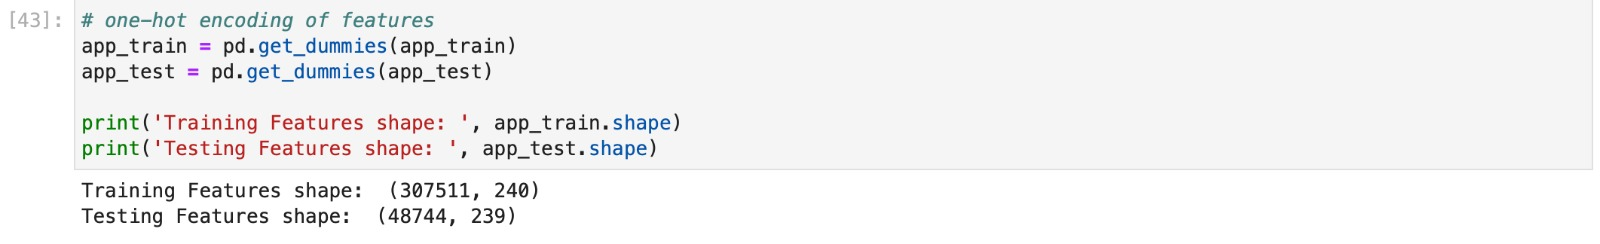

We have also used OHE in the pipeline created for processsing categorical features.

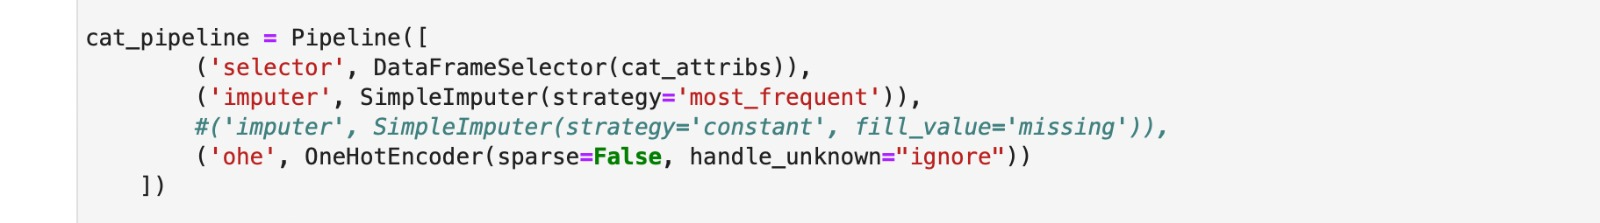

2. We performed some feature engineering using the PolynomialFeatures class to get 3-degree features on both test and train datasets. This will also help in improving the performance of our models and will be more useful during hyperparameter tuning.

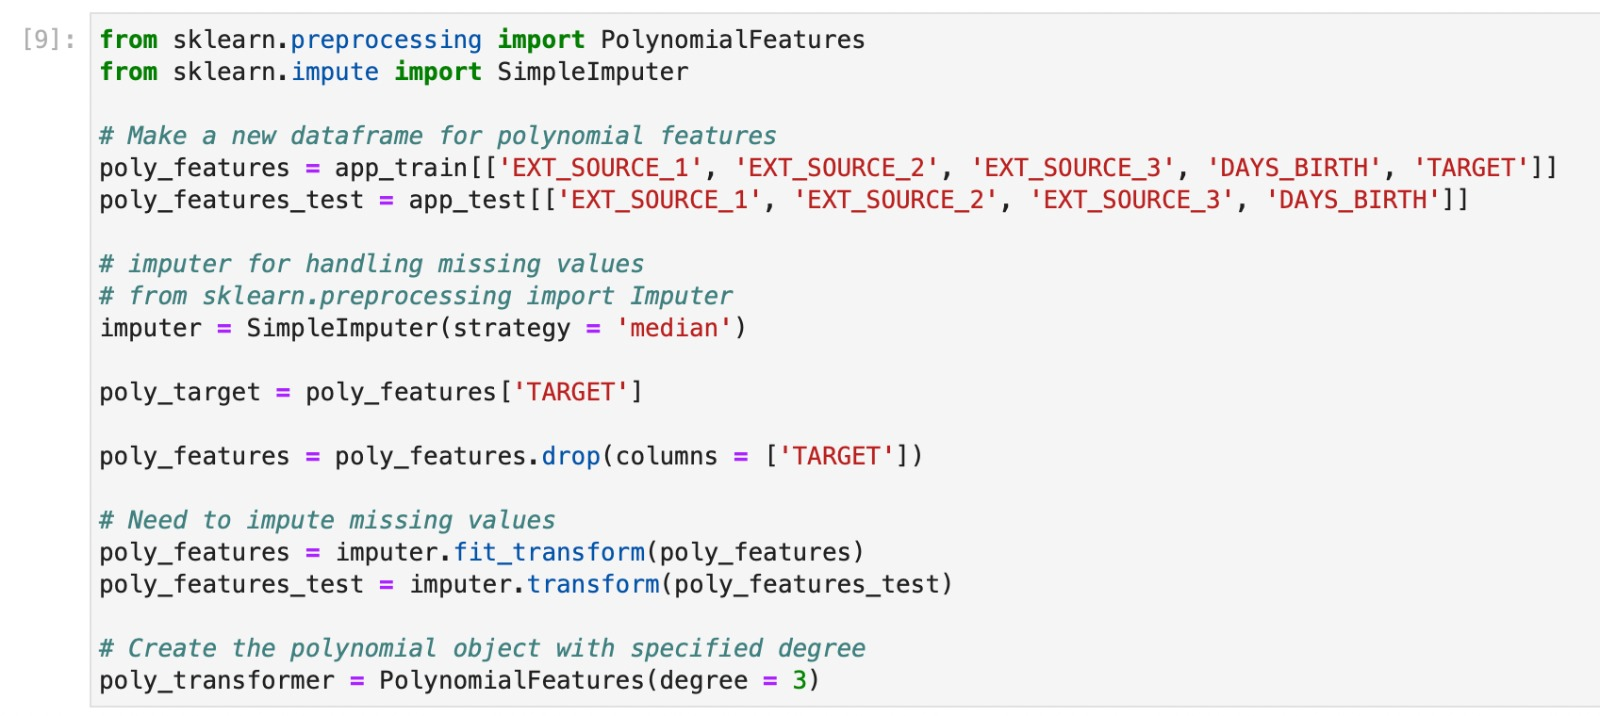

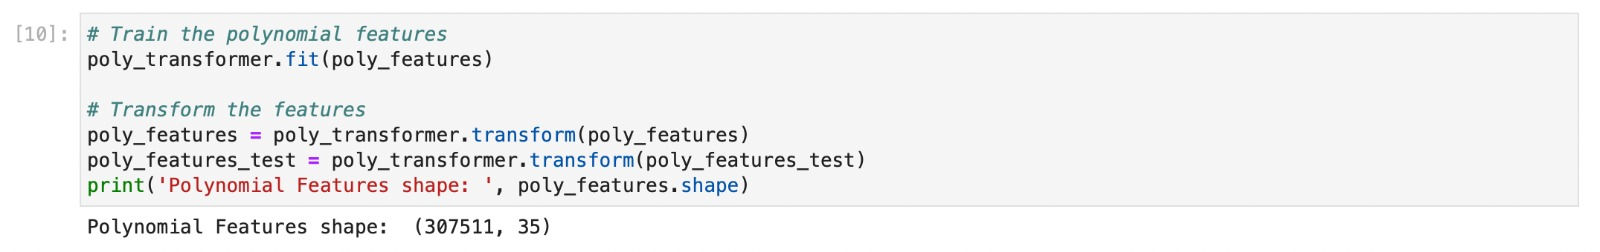

3. Label encoding has also been performed on categorical features for both test and train datasets.

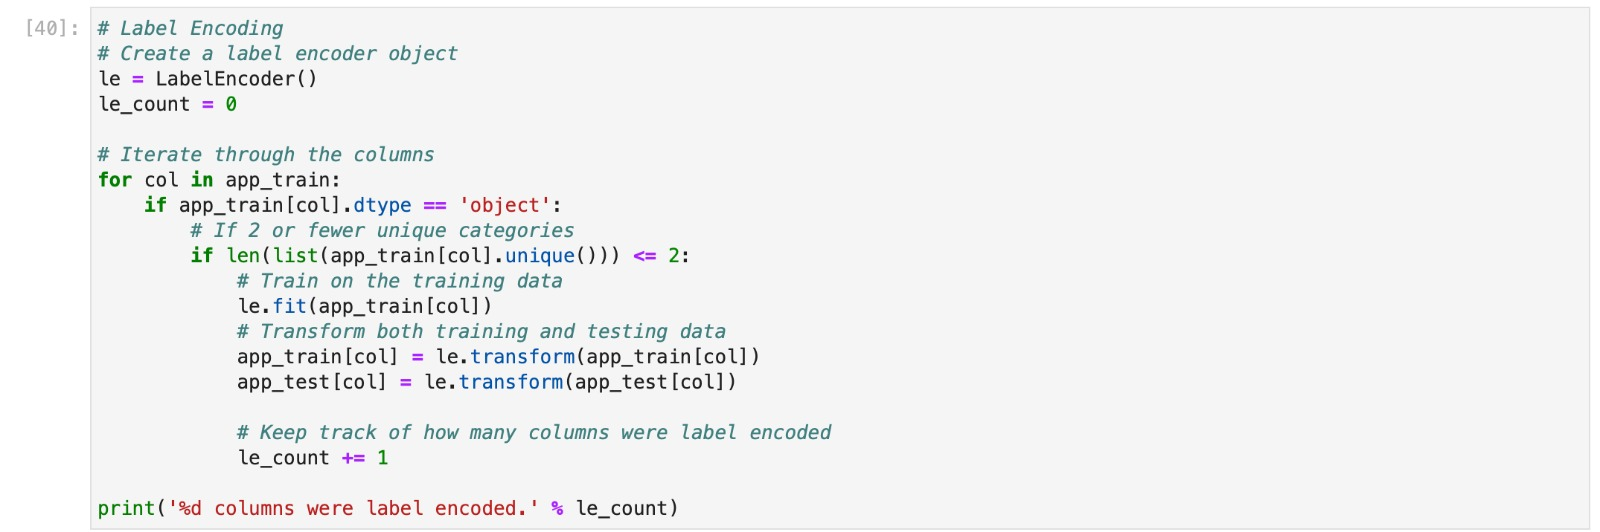

## Pipelines
We have created two separate pipelines for both numerical and categorical features respectively. Creating separate pipelines will help us to fill in missing values and perform scaling on numerical features.  
Both of these pipelines use imputer to fill in the missing values with median being used for numerical pipeline and most frequent value being used for categorical pipeline. 
One Hot Encoding is used in the categorical pipeline to convert categorical values into integers for improving the performance of our models. 
Standard Scaler is used in the numerical pipeline for scaling purposes.
The two pipelines are then combined into a single ‘data_prep_pipeline’ which is used for modeling and experiments.

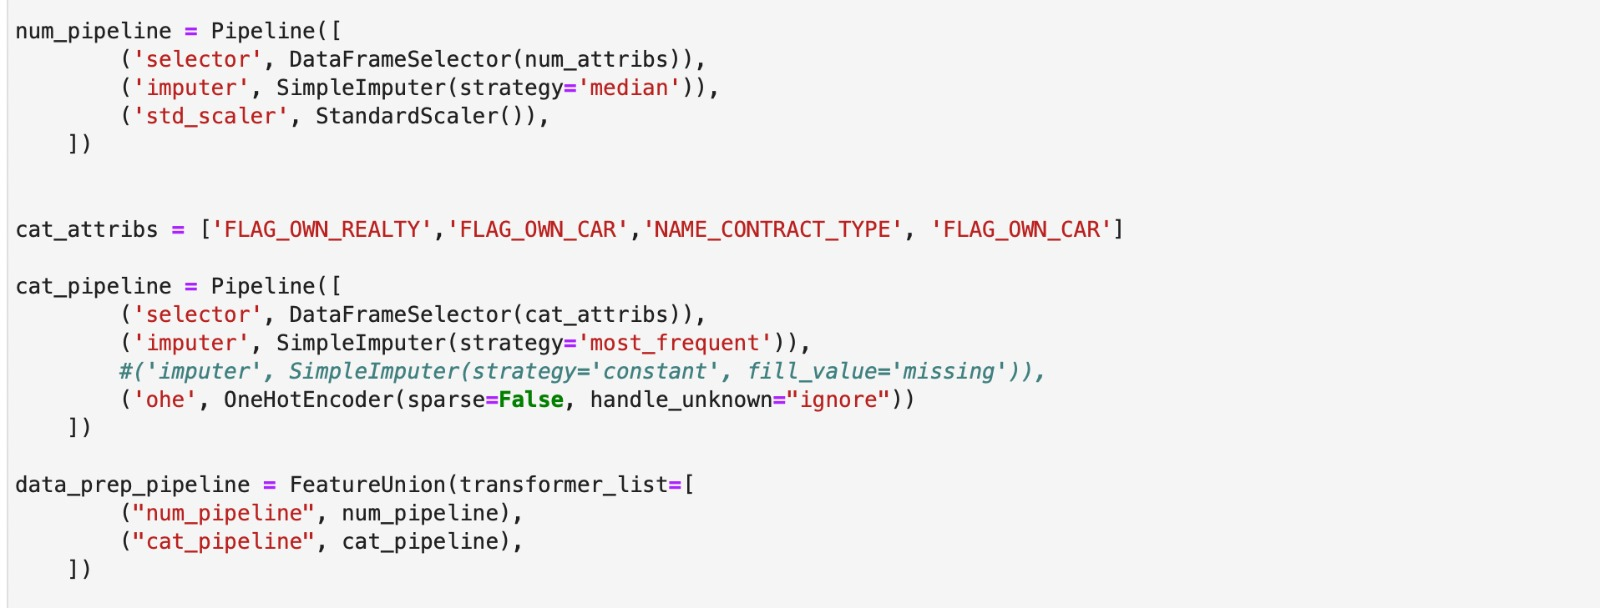

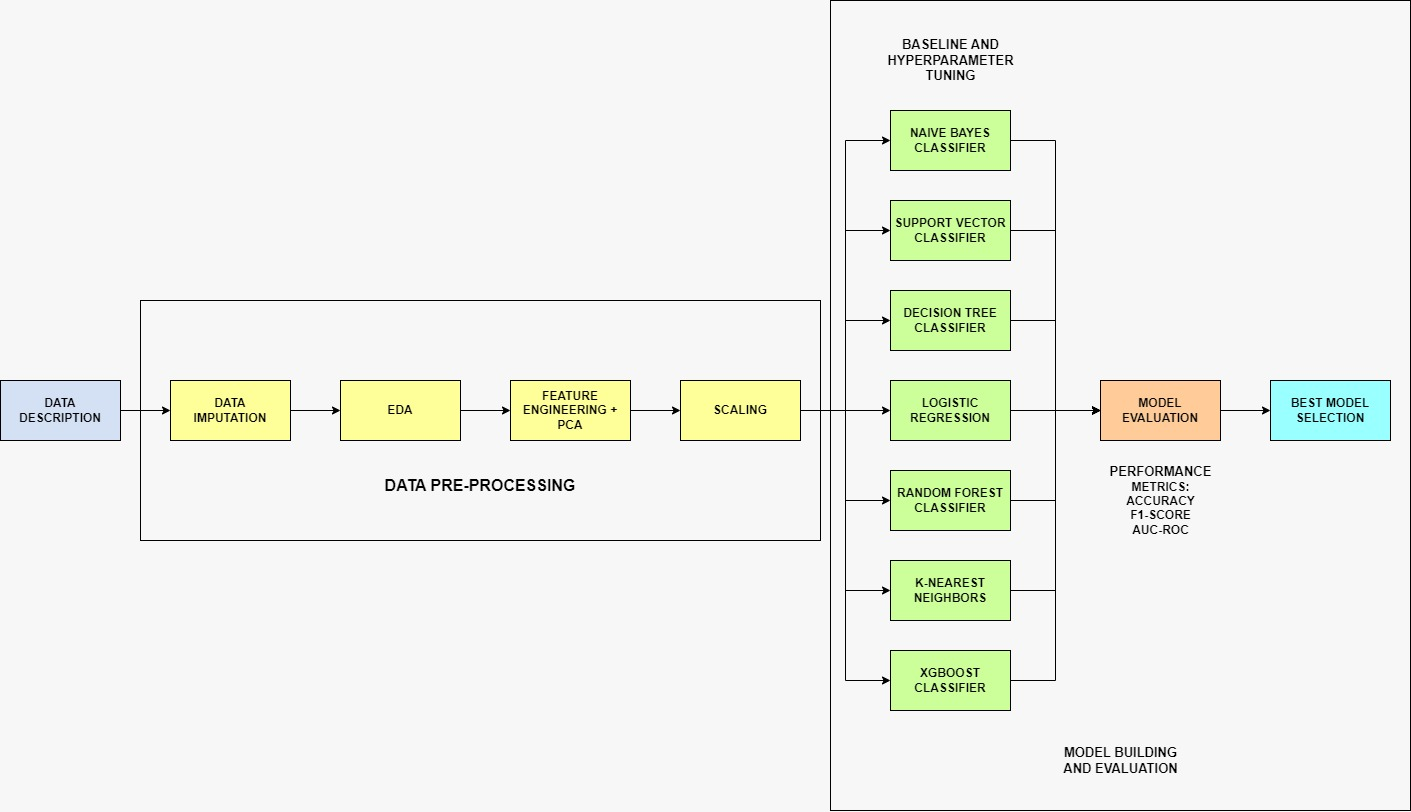

## Experimental results
Using Polynomial Features:

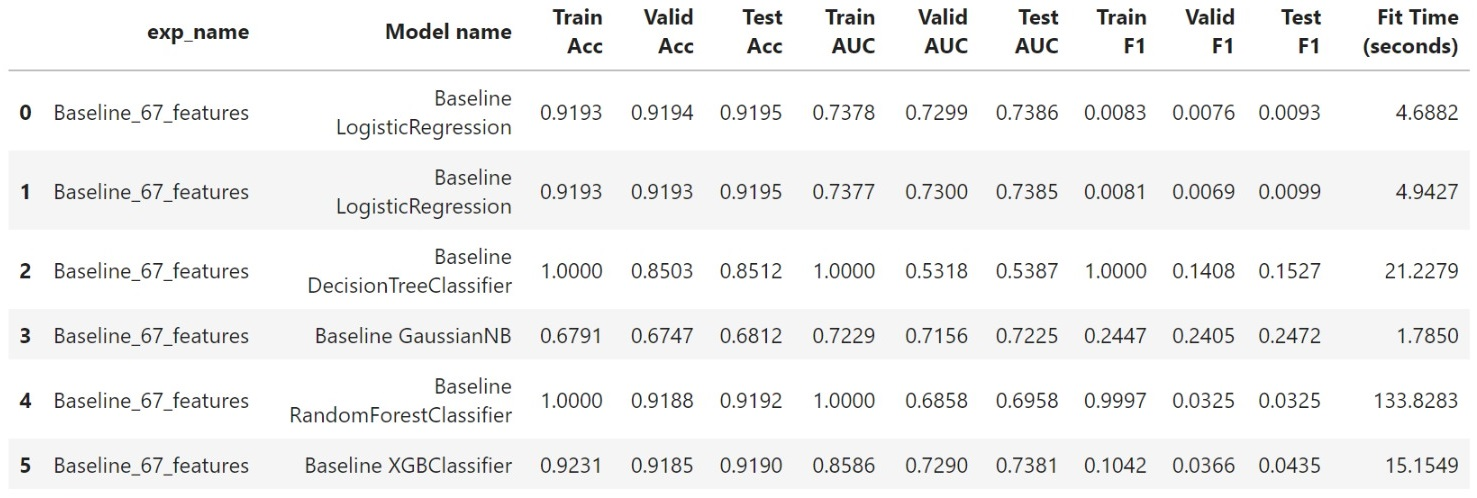

Using aggregated Features:

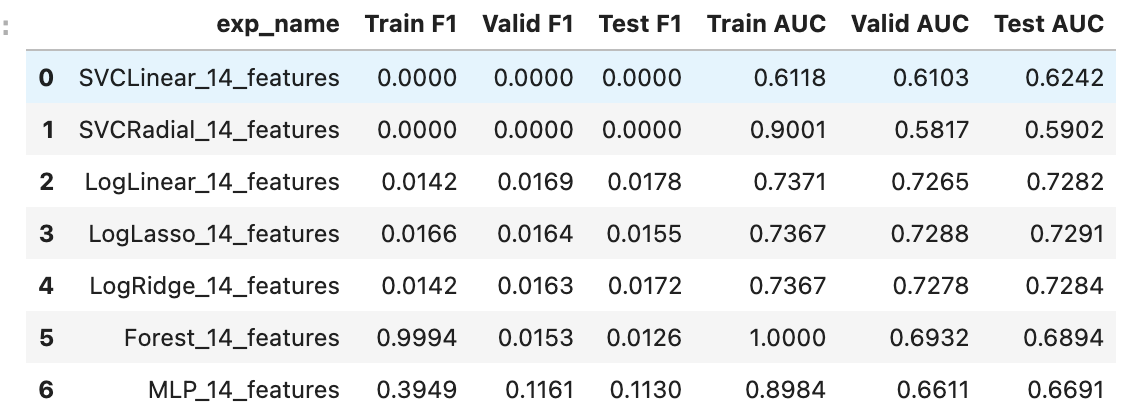

The best Test AUC was obtained for the following three classifiers:  Logistic Regression with L2 regularization, Naive Bayes and XGBoost Classifier.
Logistic Regression:

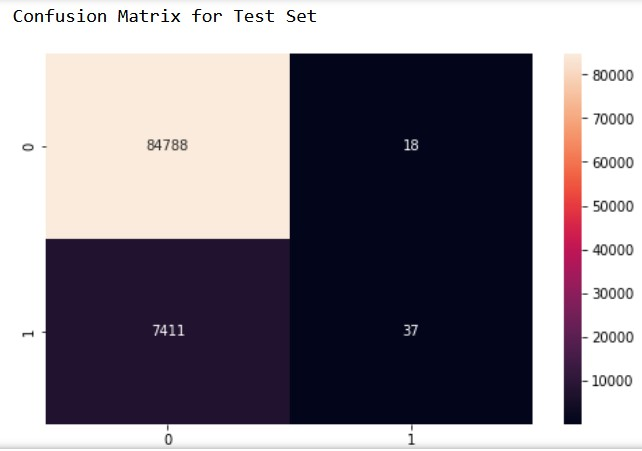

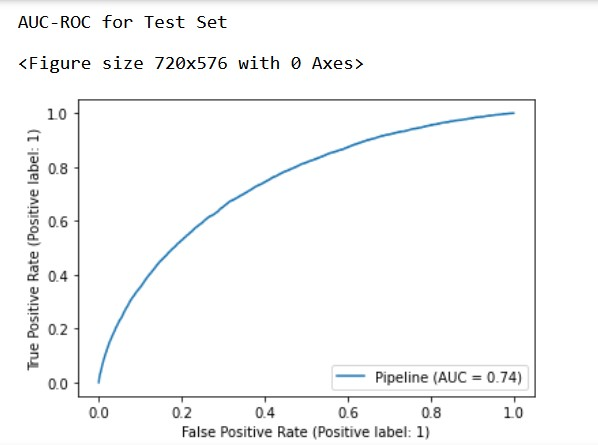

Naive Bayes:

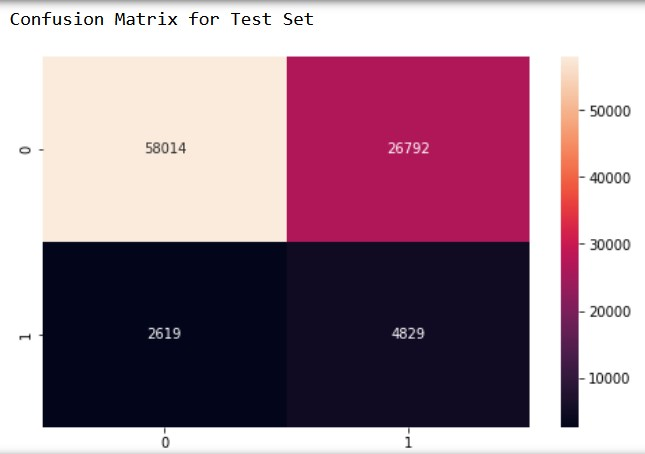

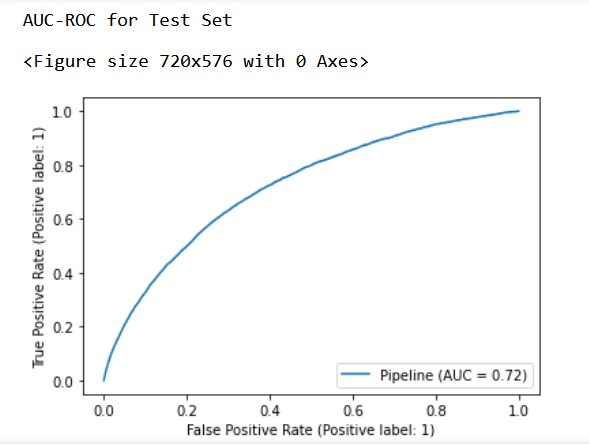

XGBoost Classifier:

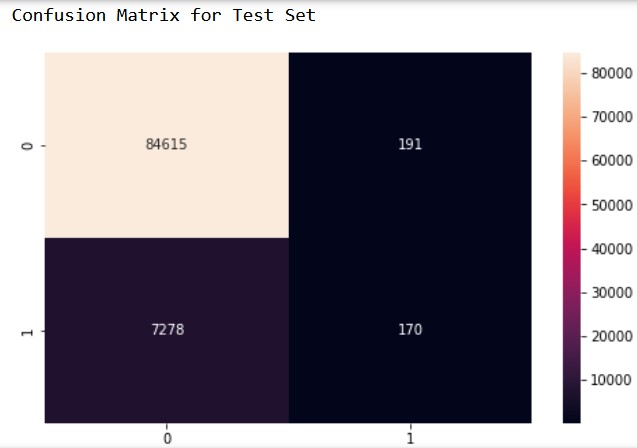


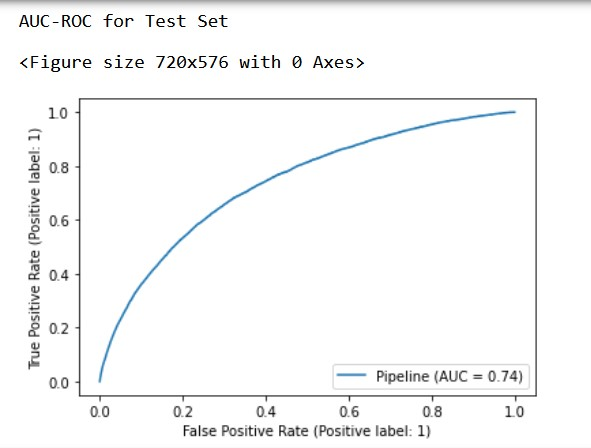



## Discussion

We finalized the pipeline with polynomial features based on the performance metrics of the models. We found that these features perform better and finalized on the logistic regression as it is faster compared to the other models and gives good performance measure.

## Phase Leader Plan

|                  Final Project Phase                 |    Phase Leader   |                                                                                                                                                                                                                               Phase Plan                                                                                                                                                                                                                               |   |   |
|:----------------------------------------------------:|:-----------------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|---|---|
|                        Phase 0                       |        Team       |                                                                                                                                                                                                                             Team Formation                                                                                                                                                                                                                             |   |   |
|               Phase 1: Project Proposal              |  Akshay Narkhede  | A project proposal will be prepared that outlines the various aspects of the project. Tasks are assigned to each member of the team. Dataset is explored and possible machine learning algorithms are discussed that can be implemented in the project. Appropriate evaluation metrics are finalized as well as a base pipeline of the project is decided.                                                                                                             |   |   |
|                Phase 2: EDA + Baseline               |   Shubham Singh   | This phase focuses on exploratory data analysis, data imputation, and baseline model training and evaluation with the decided machine learning algorithms. Inferences will be drawn through the EDA and baseline performances of various models and further decisions regarding hyperparameter tuning and feature selection will be made.                                                                                                                              |   |   |
| Phase 3: Feature Engineering + Hyperparameter Tuning | Hiren Rupchandani | Here, we will focus on the feature on selecting the most appropriate features based on various approaches like correlation, creating new features, and dimensionality reduction as well as our understanding of data from previous phases. We will also start experimenting with the various parameters of our machine learning models to help find the best set of parameters for each model. This will lead the way for a great race between the various algorithms. |   |   |
|               Phase 4: Final Submission              |    Gabriel Levy   | This phase will involve using deep neural networks and we will be comparing their performance with the already fine tuned models from our previous phase. The best model will be selected based on our various performance metrics and will be presented in our final submission.                                                                                                                                                                                      |   |   |

## Credit Assignment

|     Team Member    |                              Task                             |   |   |   |
|:------------------:|:-------------------------------------------------------------:|:-:|---|---|
|   Akshay Narkhede  | EDA and Data Preprocessing                                    |   |   |   |
|    Shubham Singh   | Feature Engineering and Baseline Modeling                     |   |   |   |
| Hiren Rupchandani  | Feature Selection, Dimensionality Reduction, Model Evaluation |   |   |   |
|    Gabriel Levy    | Hyperparameter Tuning, Best model selection                   |   |   |   |
|                    |                                                               |   |   |   |

## Conclusion

In this phase, our key goals were to perform EDA, engineer new features, and create a baseline model for predicting default risk.

Understanding the correlation between datasets and extracting the complicated features were the two major issues that were encountered. The baseline Ridge Logistic Regression model produced an ROC-AUC score of 72.4% and a Training ROC-AUC score of about 73.7% upon Kaggle submission.

**Past** : Understanding the project requirements. Building project plan.

**Present** : Exploratory Data Analysis, understanding the correlation between features, engineering new features, and building baseline models.

**Proposed** : Additional feature engineering, addition of new features through other tables. Including more classifiers using neural networks.  Performing hyper-parameter tuning to improve performance.



## Kaggle Submission

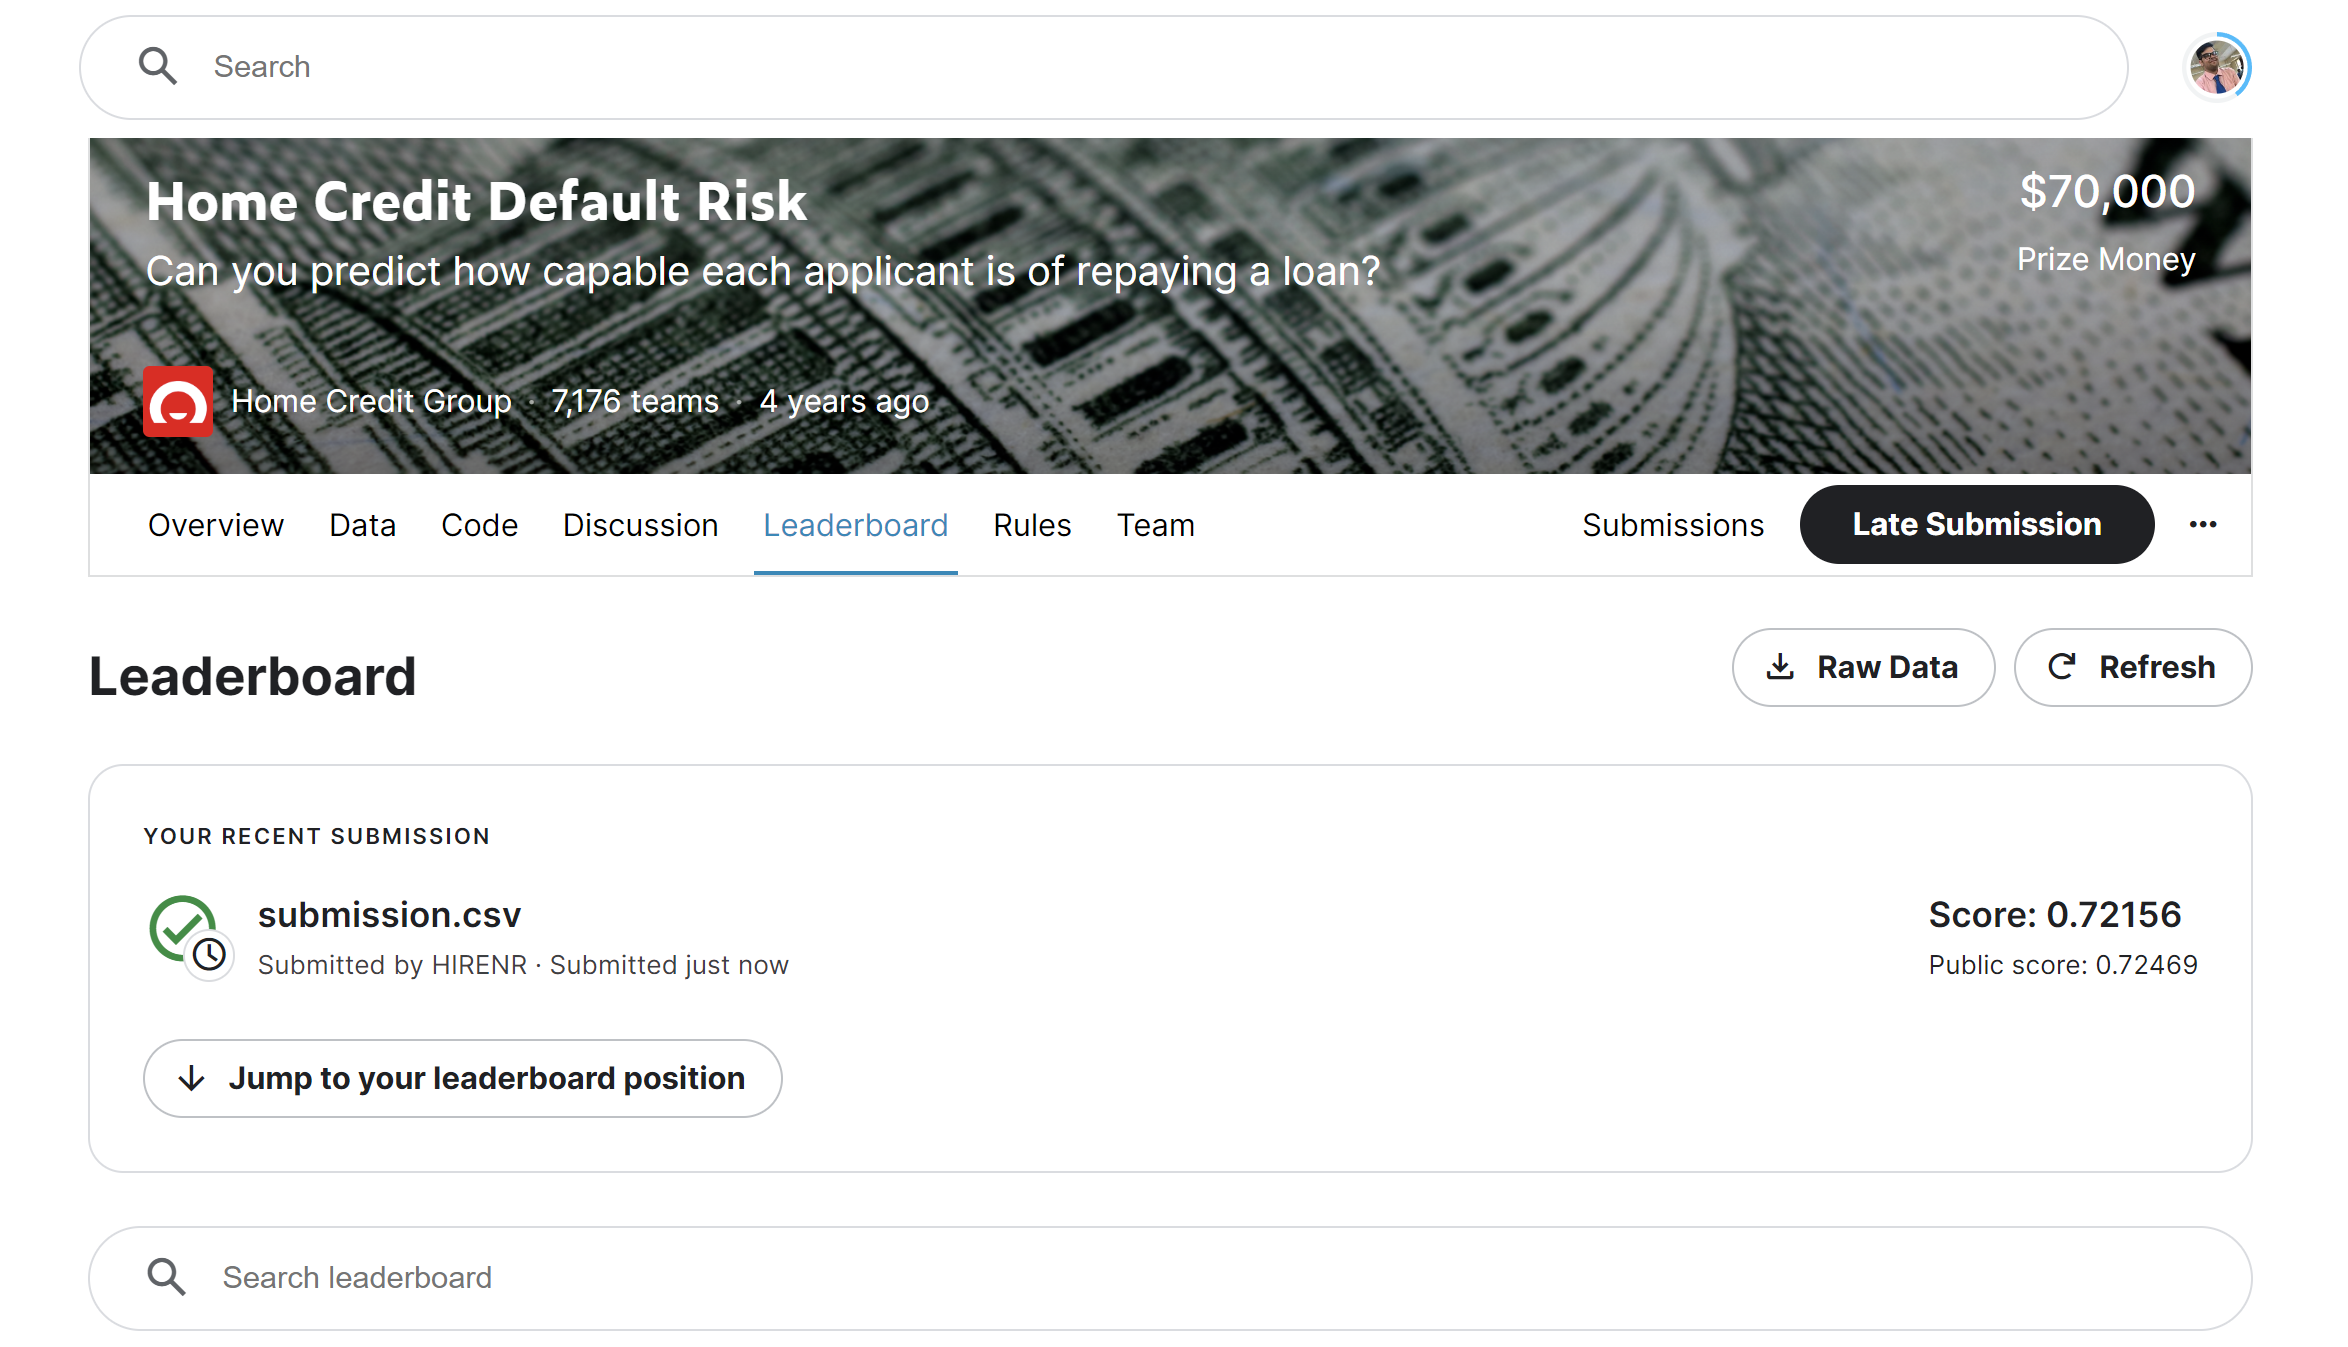

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)

- The above notebook was referred for the phase


#  TODO: Predicting Loan Repayment with Automated Feature Engineering in Featuretools

Read the following:
* feature engineering via Featuretools library: 
  * https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb
* https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/
* feature engineering paper: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
* https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/